# **Metrics Test**

Το παρόν έχει σκοπό να τεσταριστούν διάφορες μετρικές δικτύων, ώστε να φανεί ποιες παρουσιάζουν τις μεγαλύτερες διαφορές ανά μοντέλο, και να επιλεγούν.

Ο Regular Graph παραλείπεται καθώς κανένα φυσικό δίκτυο δεν είναι regular (και αν είναι φαίνεται αμέσως από την κατανομή βαθμών κόμβων).

Παραλείπεται και η μετρική Degree Destribution, επειδή ξέρουμε ήδη ότι είναι σημαντική και θα χρησιμοποιηθεί έτσι κι αλλιώς. Η μετρική degree centrality είναι ίδια με την degree distribution και γι αυτό παραλείπεται επίσης.

Οι μετρικές που θα ελεγχθούν είναι οι: Average Path Length, Clustering Coeffcient, Centrality (Betweenness, Closeness, Information, Routing, Bridging, Spectral, Eignevectror, Katz, Laplacian, Harmonic, Percolation, Load), Rich Club Coefficient, Closeness Vitality, Assortativity

In [1]:
%matplotlib inline
import matplotlib as plt
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time

## **Παραγωγή Γράφων**

In [2]:
RG_ER = nx.gnm_random_graph(1000,5000) # Random Graph, Erdos-Renyi
RG_G = nx.gnp_random_graph(1000, 0.5)  # Random Graph, Gilbert
RGG = nx.random_geometric_graph(1000,0.5) # Random Geometric Graph
SW = nx.watts_strogatz_graph(1000, 5, 0.5) # Small World, Newman Watts
SF = nx.barabasi_albert_graph(1000, 5) # Scale Free, Barabasi Albert
WA = nx.waxman_graph(1000, L = 5) # Spatial Network, Waxman (και ο RGG είναι SN!)

## **Degree Distribution**

In [3]:
def dd(G):
  start = time.time()
  deglist = []
  degrees = dict(G.degree(G))
  print("Η κατανομή των βαθμών των κόμβων είναι η εξής:")
  fig = plt.hist(degrees.values(), bins=10)
  plt.xlabel('Degrees')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in degrees.values():
    deglist.append(value)
  degaverage = np.average(deglist)
  degvariance = np.var(deglist)
  print("Ο μέσος βαθμός κόμβου είναι", degaverage, "και η διασπορά του είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end-start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή των βαθμών των κόμβων είναι η εξής:


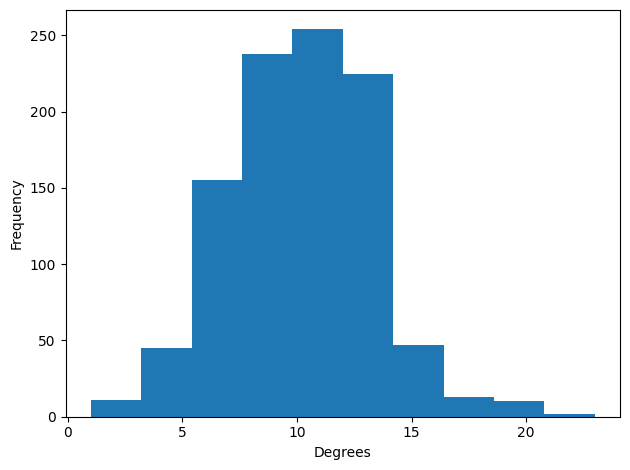

Ο μέσος βαθμός κόμβου είναι 10.0 και η διασπορά του είναι 9.636
Χρόνος εκτέλεσης:  0.5133476257324219
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή των βαθμών των κόμβων είναι η εξής:


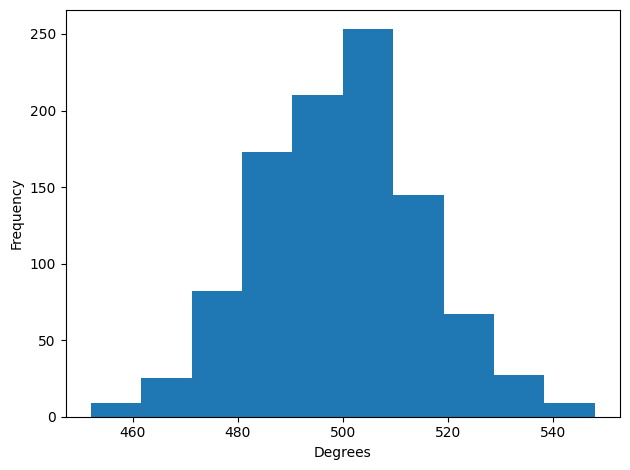

Ο μέσος βαθμός κόμβου είναι 499.47 και η διασπορά του είναι 246.78109999999998
Χρόνος εκτέλεσης:  0.27997732162475586
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή των βαθμών των κόμβων είναι η εξής:


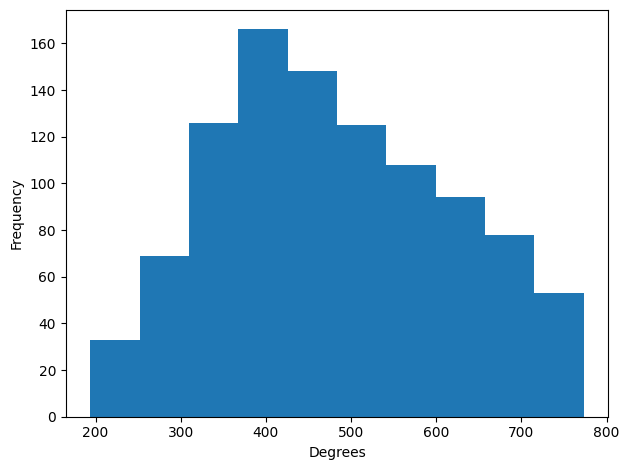

Ο μέσος βαθμός κόμβου είναι 480.218 και η διασπορά του είναι 18438.096476
Χρόνος εκτέλεσης:  0.3317911624908447
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή των βαθμών των κόμβων είναι η εξής:


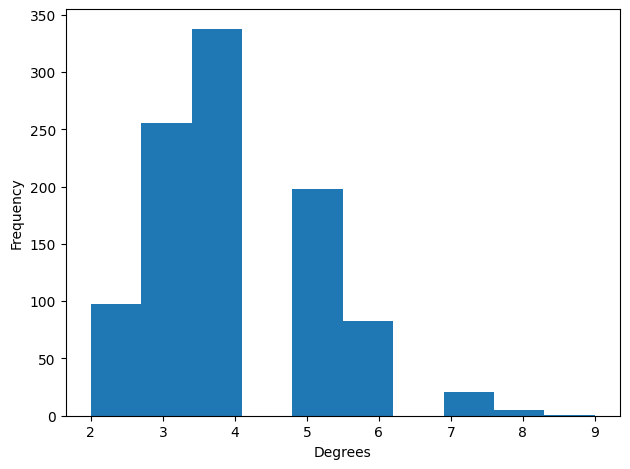

Ο μέσος βαθμός κόμβου είναι 4.0 και η διασπορά του είναι 1.472
Χρόνος εκτέλεσης:  0.5727677345275879
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή των βαθμών των κόμβων είναι η εξής:


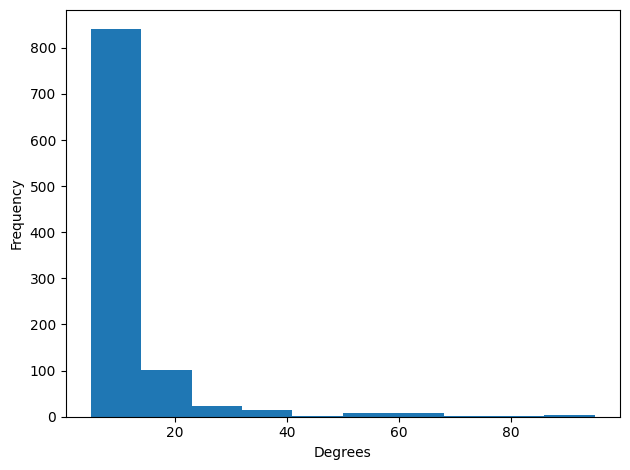

Ο μέσος βαθμός κόμβου είναι 9.95 και η διασπορά του είναι 98.22949999999999
Χρόνος εκτέλεσης:  0.3107185363769531
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή των βαθμών των κόμβων είναι η εξής:


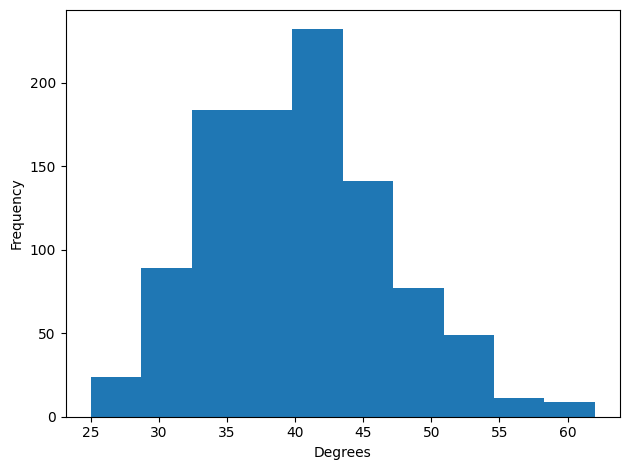

Ο μέσος βαθμός κόμβου είναι 40.23 και η διασπορά του είναι 42.5491
Χρόνος εκτέλεσης:  0.38463711738586426
 
Η διασπορά της μέσης τιμής της Κατανομής Βαθμών Κόμβων είναι:  50050.49948666667 και ο συντελεστής διασποράς εἰναι:  1.2859079282282913
Ο συνολικός χρόνος υπολογισμού της Κατανομής Βαθμών Κόμβων είναι:  2.3932394981384277 δευτερόλεπτα


In [4]:
dd_variance = []
dd_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = dd(RG_ER)
dd_variance.append(a)
dd_time = dd_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = dd(RG_G)
dd_variance.append(a)
dd_time = dd_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = dd(RGG)
dd_variance.append(a)
dd_time = dd_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = dd(SW)
dd_variance.append(a)
dd_time = dd_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = dd(SF)
dd_variance.append(a)
dd_time = dd_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = dd(WA)
dd_variance.append(a)
dd_time = dd_time + b
print(" ")

print("Η διασπορά της μέσης τιμής της Κατανομής Βαθμών Κόμβων είναι: ", np.var(dd_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(dd_variance))/np.mean(dd_variance))
print("Ο συνολικός χρόνος υπολογισμού της Κατανομής Βαθμών Κόμβων είναι: ", dd_time, "δευτερόλεπτα")

## **Average Path Length**

In [5]:
def compute_path_lengths(G):
  start = time.time()
  #μέσο μήκος μονοπατιού = άθροισμα των μηκών όλων των δυνατών μονοπατιών δια το πλήθος των δυνατών μονοπατιών
  spathsret = list(nx.all_pairs_shortest_path_length(G))
  #έχω λίστα με πολλά tuples (int, dictionary) που πρέπει να φέρω σε κατάλληλη μορφή για το sum
  sp = list(sum(spathsret, ()))
  spaths = [x for x in sp if not isinstance(x, int)]
  totalsum = 0
  totalpathnumber = 0
  for i in spaths:
    tempsum = sum(i.values())
    totalsum = totalsum + tempsum
    pathnumber = len(i)
    totalpathnumber = totalpathnumber + pathnumber
  varlist = []
  print("Το μέσο μήκος μονοπατιού στον γράφο είναι ", totalsum/totalpathnumber)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return totalsum/totalpathnumber, end-start

In [6]:
pl_variance = []
pl_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = compute_path_lengths(RG_ER)
pl_variance.append(a)
pl_time = pl_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = compute_path_lengths(RG_G)
pl_variance.append(a)
pl_time = pl_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = compute_path_lengths(RGG)
pl_variance.append(a)
pl_time = pl_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = compute_path_lengths(SW)
pl_variance.append(a)
pl_time = pl_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = compute_path_lengths(SF)
pl_variance.append(a)
pl_time = pl_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = compute_path_lengths(WA)
pl_variance.append(a)
pl_time = pl_time + b
print(" ")

print("Η διασπορά της μετρικής Μέσο Μήκος Μονοπατιού είναι: ", np.var(pl_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(pl_variance))/np.mean(pl_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Μέσο Μήκος Μονοπατιού είναι: ", pl_time, "δευτερόλεπτα")
#Coefficient of variation, αν >1 τότε μεγάλο variance

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Το μέσο μήκος μονοπατιού στον γράφο είναι  3.25436
Χρόνος εκτέλεσης:  2.9462311267852783
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Το μέσο μήκος μονοπατιού στον γράφο είναι  1.49853
Χρόνος εκτέλεσης:  2.2075693607330322
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Το μέσο μήκος μονοπατιού στον γράφο είναι  1.547006
Χρόνος εκτέλεσης:  13.795976877212524
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Το μέσο μήκος μονοπατιού στον γράφο είναι  5.575534
Χρόνος εκτέλεσης:  0.5498828887939453
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Το μέσο μήκος μονοπατιού στον γράφο είναι  2.992966
Χρόνος εκτέλεσης:  0.5493028163909912
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Το μέσο μήκος μονοπατιού στον γράφο είναι  2.148068
Χρόνος εκτέλεσης:  0.5502941608428955
 
Η διασπορά της μετρικής Μέσο Μήκος Μονοπατιού είναι:  1.9380486475982224 και ο συντελεστής διασποράς εἰναι:  0.4908674881430302
Ο συνολικός χρόνος υπολογισμού τ

## **Diameter**

In [7]:
def compute_diameter(G):
  start = time.time()
  diam = nx.diameter(G)
  print("Η διάμετρος του γράφου είναι ", diam)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return diam, end-start

In [8]:
d_variance = []
d_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = compute_diameter(RG_ER)
d_variance.append(a)
d_time = d_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = compute_diameter(RG_G)
d_variance.append(a)
d_time = d_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = compute_diameter(RGG)
d_variance.append(a)
d_time = d_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = compute_diameter(SW)
d_variance.append(a)
d_time = d_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = compute_diameter(SF)
d_variance.append(a)
d_time = d_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = compute_diameter(WA)
d_variance.append(a)
d_time = d_time + b
print(" ")

print("Η διασπορά της Διαμέτρου είναι: ", np.var(d_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(d_variance))/np.mean(d_variance))
print("Ο συνολικός χρόνος υπολογισμού της Διαμέτρου είναι: ", d_time, "δευτερόλεπτα")

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η διάμετρος του γράφου είναι  5
Χρόνος εκτέλεσης:  0.5982744693756104
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η διάμετρος του γράφου είναι  2
Χρόνος εκτέλεσης:  0.42723965644836426
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η διάμετρος του γράφου είναι  3
Χρόνος εκτέλεσης:  6.428098440170288
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η διάμετρος του γράφου είναι  10
Χρόνος εκτέλεσης:  0.9159295558929443
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η διάμετρος του γράφου είναι  5
Χρόνος εκτέλεσης:  0.9631235599517822
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η διάμετρος του γράφου είναι  3
Χρόνος εκτέλεσης:  0.9281163215637207
 
Η διασπορά της Διαμέτρου είναι:  6.888888888888889 και ο συντελεστής διασποράς εἰναι:  0.5624291338579864
Ο συνολικός χρόνος υπολογισμού της Διαμέτρου είναι:  10.26078200340271 δευτερόλεπτα


## **Radius**

In [9]:
def compute_radius(G):
  start = time.time()
  rad = nx.radius(G)
  print("Η ακτίνα του γράφου είναι ", rad)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return rad, end-start

In [10]:
r_variance = []
r_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = compute_radius(RG_ER)
r_variance.append(a)
r_time = r_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = compute_radius(RG_G)
r_variance.append(a)
r_time = r_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = compute_radius(RGG)
r_variance.append(a)
r_time = r_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = compute_radius(SW)
r_variance.append(a)
r_time = r_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = compute_radius(SF)
r_variance.append(a)
r_time = r_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = compute_radius(WA)
r_variance.append(a)
r_time = r_time + b
print(" ")

print("Η διασπορά της μετρικής Μέσο Μήκος Μονοπατιού είναι: ", np.var(r_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(r_variance))/np.mean(r_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Μέσο Μήκος Μονοπατιού είναι: ", r_time, "δευτερόλεπτα")

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η ακτίνα του γράφου είναι  4
Χρόνος εκτέλεσης:  0.5837059020996094
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η ακτίνα του γράφου είναι  2
Χρόνος εκτέλεσης:  0.42154550552368164
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η ακτίνα του γράφου είναι  2
Χρόνος εκτέλεσης:  6.470243453979492
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η ακτίνα του γράφου είναι  7
Χρόνος εκτέλεσης:  0.5330460071563721
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η ακτίνα του γράφου είναι  3
Χρόνος εκτέλεσης:  0.552971601486206
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η ακτίνα του γράφου είναι  3
Χρόνος εκτέλεσης:  0.5168676376342773
 
Η διασπορά της μετρικής Μέσο Μήκος Μονοπατιού είναι:  2.9166666666666665 και ο συντελεστής διασποράς εἰναι:  0.48795003647426655
Ο συνολικός χρόνος υπολογισμού της μετρικής Μέσο Μήκος Μονοπατιού είναι:  9.078380107879639 δευτερόλεπτα


## **Clustering Coefficient**

In [11]:
def cc(G):
  start = time.time()
  coeflist = []
  coefficient=nx.clustering(G)
  print("Η κατανομή του συντελεστή συσταδοποίησης των κόμβων είναι η εξής:")
  fig = plt.hist(coefficient.values(), bins=10)
  plt.xlabel('Clustering Coefficient')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in coefficient.values():
    coeflist.append(value)
  variance = np.var(coeflist)
  print("Ο μέσος συντελεστής ομαδοποίησης είναι ", nx.average_clustering(G), "και η διασπορά του είναι", variance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return nx.average_clustering(G), end-start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή συσταδοποίησης των κόμβων είναι η εξής:


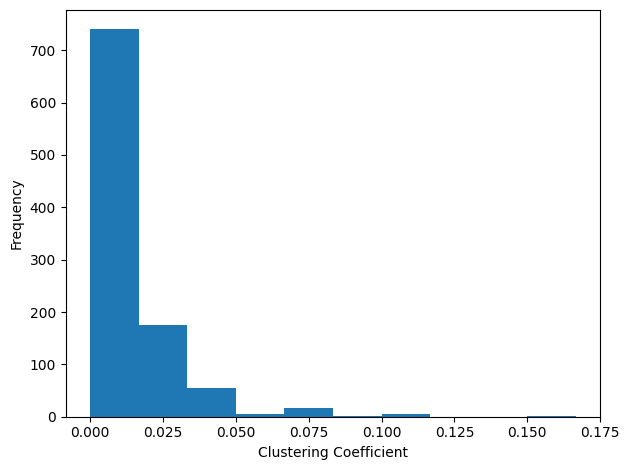

Ο μέσος συντελεστής ομαδοποίησης είναι  0.009809238459749967 και η διασπορά του είναι 0.00029435426081001425
Χρόνος εκτέλεσης:  0.2206432819366455
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή συσταδοποίησης των κόμβων είναι η εξής:


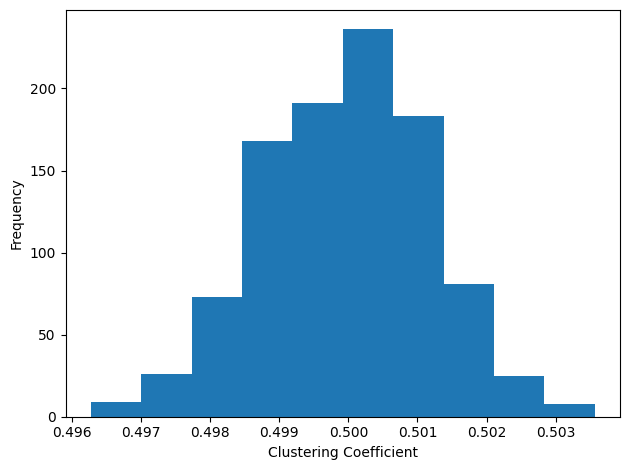

Ο μέσος συντελεστής ομαδοποίησης είναι  0.49996871055958353 και η διασπορά του είναι 1.4598706791958436e-06
Χρόνος εκτέλεσης:  64.07655143737793
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή συσταδοποίησης των κόμβων είναι η εξής:


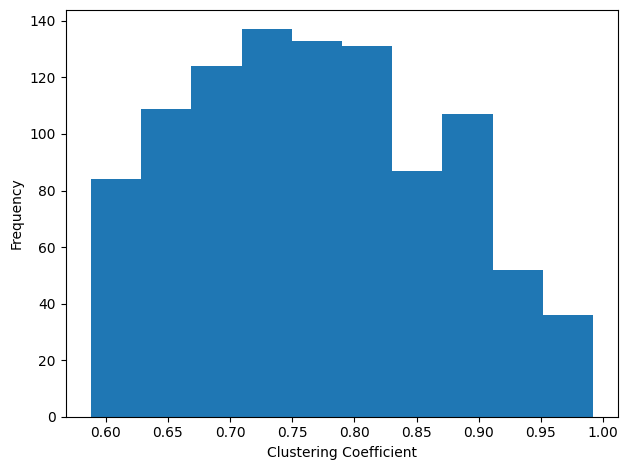

Ο μέσος συντελεστής ομαδοποίησης είναι  0.7690200554889305 και η διασπορά του είναι 0.009916416613808038
Χρόνος εκτέλεσης:  59.61021041870117
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή συσταδοποίησης των κόμβων είναι η εξής:


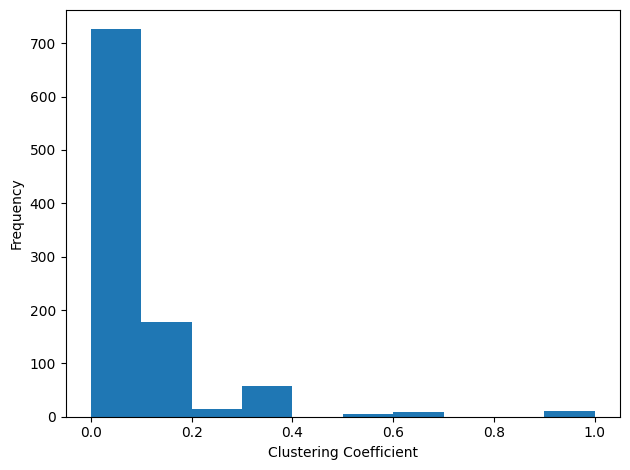

Ο μέσος συντελεστής ομαδοποίησης είναι  0.06807777777777779 και η διασπορά του είναι 0.021984277346938776
Χρόνος εκτέλεσης:  0.1766958236694336
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή συσταδοποίησης των κόμβων είναι η εξής:


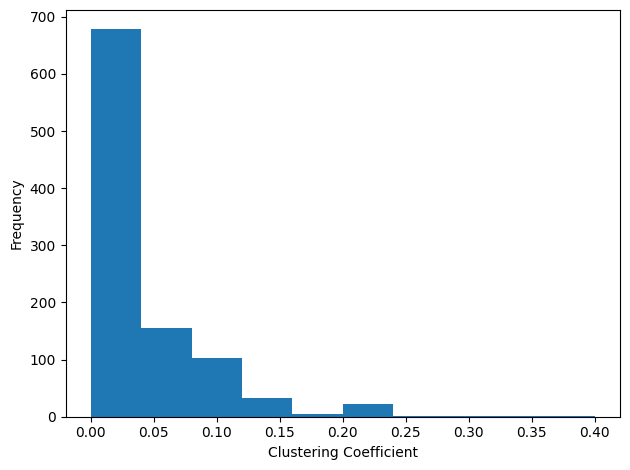

Ο μέσος συντελεστής ομαδοποίησης είναι  0.03601341275058374 και η διασπορά του είναι 0.002561320061552273
Χρόνος εκτέλεσης:  0.27779555320739746
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή συσταδοποίησης των κόμβων είναι η εξής:


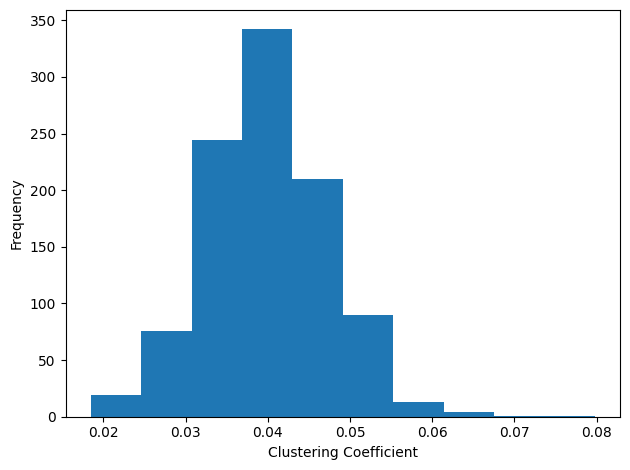

Ο μέσος συντελεστής ομαδοποίησης είναι  0.0399058998516015 και η διασπορά του είναι 5.4949997913518385e-05
Χρόνος εκτέλεσης:  0.660313606262207
 
Η διασπορά της μετρικής Clustering Coefficient είναι:  0.08526497144506244 και ο συντελεστής διασποράς εἰναι:  1.2313860139566786
Ο συνολικός χρόνος υπολογισμού της μετρικής Clustering Coefficient είναι:  125.02221012115479 δευτερόλεπτα


In [12]:
cc_variance = []
cc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = cc(RG_ER)
cc_variance.append(a)
cc_time = cc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = cc(RG_G)
cc_variance.append(a)
cc_time = cc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = cc(RGG)
cc_variance.append(a)
cc_time = cc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = cc(SW)
cc_variance.append(a)
cc_time = cc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = cc(SF)
cc_variance.append(a)
cc_time = cc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = cc(WA)
cc_variance.append(a)
cc_time = cc_time + b
print(" ")

print("Η διασπορά της μετρικής Clustering Coefficient είναι: ", np.var(cc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(cc_variance))/np.mean(cc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Clustering Coefficient είναι: ", cc_time, "δευτερόλεπτα")

## **Betweenness Centrality**

In [13]:
def find_betweenness(G):
  start = time.time()
  betlist = []
  bet_centr = nx.betweenness_centrality(G)
  print("Η κατανομή της ενδιαμεσικής κεντρικότητας των κόμβων είναι η εξής:")
  fig = plt.hist(bet_centr.values(), bins=10)
  plt.xlabel('Betweenness Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in bet_centr.values():
    betlist.append(value)
  degaverage = np.average(betlist)
  degvariance = np.var(betlist)
  print("Η μέση ενδιαμεσική κεντρικότητα είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της ενδιαμεσικής κεντρικότητας των κόμβων είναι η εξής:


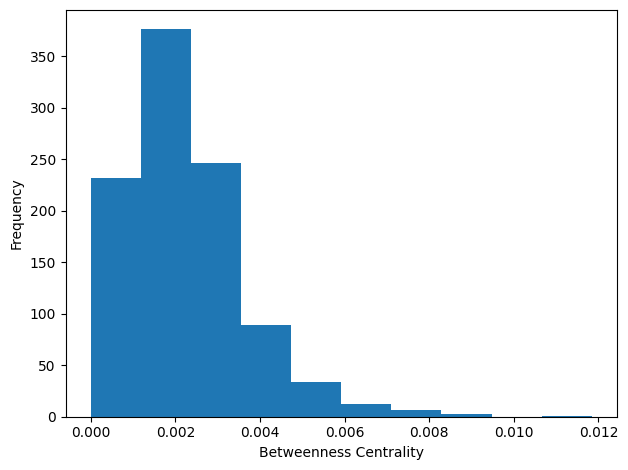

Η μέση ενδιαμεσική κεντρικότητα είναι 0.0022621419014204587 και η διασπορά της είναι 2.009297997459379e-06
Χρόνος εκτέλεσης:  4.241887331008911
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της ενδιαμεσικής κεντρικότητας των κόμβων είναι η εξής:


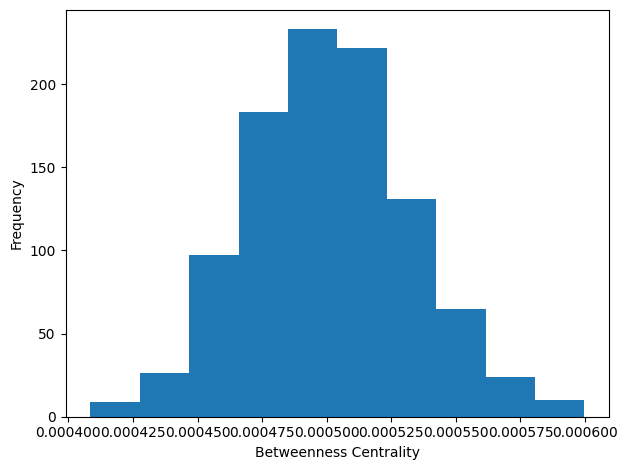

Η μέση ενδιαμεσική κεντρικότητα είναι 0.0005010320942184665 και η διασπορά της είναι 1.0077930076579287e-09
Χρόνος εκτέλεσης:  93.75553345680237
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της ενδιαμεσικής κεντρικότητας των κόμβων είναι η εξής:


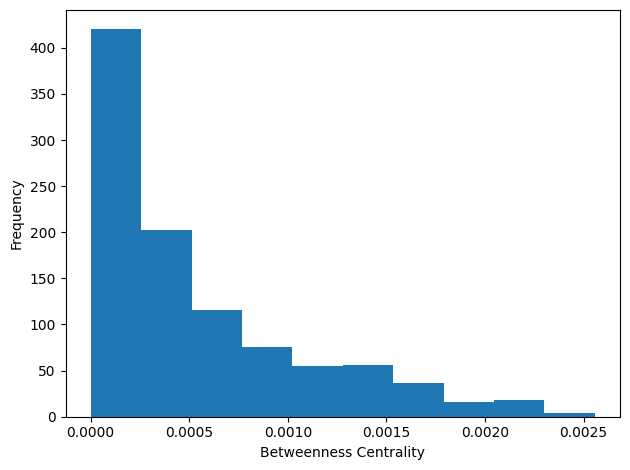

Η μέση ενδιαμεσική κεντρικότητα είναι 0.0005496538622791127 και η διασπορά της είναι 3.013795693628346e-07
Χρόνος εκτέλεσης:  69.67786002159119
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της ενδιαμεσικής κεντρικότητας των κόμβων είναι η εξής:


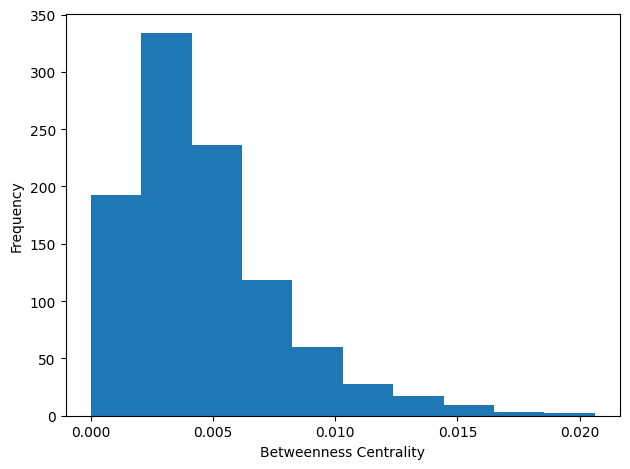

Η μέση ενδιαμεσική κεντρικότητα είναι 0.004590295706528171 και η διασπορά της είναι 9.929874318235865e-06
Χρόνος εκτέλεσης:  3.6034553050994873
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της ενδιαμεσικής κεντρικότητας των κόμβων είναι η εξής:


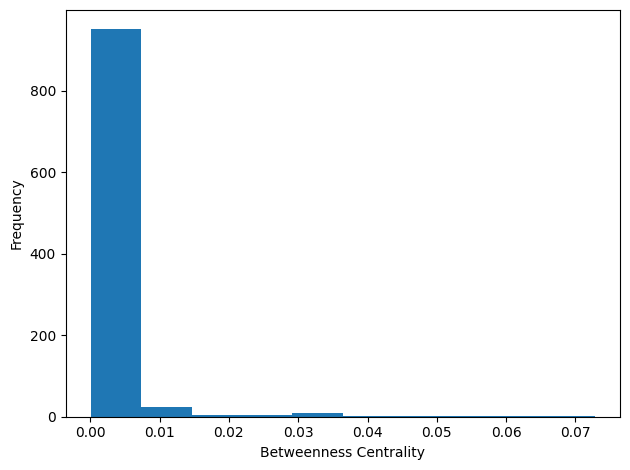

Η μέση ενδιαμεσική κεντρικότητα είναι 0.0019999618857334286 και η διασπορά της είναι 3.6109752098605457e-05
Χρόνος εκτέλεσης:  5.025000810623169
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της ενδιαμεσικής κεντρικότητας των κόμβων είναι η εξής:


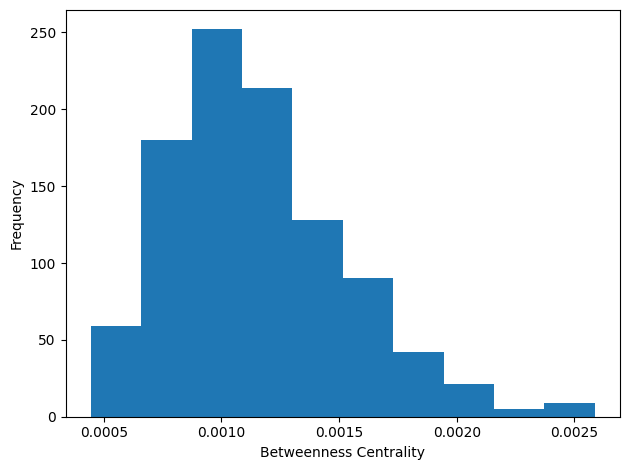

Η μέση ενδιαμεσική κεντρικότητα είναι 0.0011525232647477135 και η διασπορά της είναι 1.4179543060300377e-07
Χρόνος εκτέλεσης:  9.213335752487183
 
Η διασπορά της μετρικής Betweenness Centrality είναι:  1.949721654532771e-06 και ο συντελεστής διασποράς εἰναι:  0.7578005190814231
Ο συνολικός χρόνος υπολογισμού της μετρικής Betweenness Centrality είναι:  185.5170726776123 δευτερόλεπτα


In [14]:
bc_variance = []
bc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_betweenness(RG_ER)
bc_variance.append(a)
bc_time = bc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_betweenness(RG_G)
bc_variance.append(a)
bc_time = bc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_betweenness(RGG)
bc_variance.append(a)
bc_time = bc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_betweenness(SW)
bc_variance.append(a)
bc_time = bc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_betweenness(SF)
bc_variance.append(a)
bc_time = bc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_betweenness(WA)
bc_variance.append(a)
bc_time = bc_time + b
print(" ")

print("Η διασπορά της μετρικής Betweenness Centrality είναι: ", np.var(bc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(bc_variance))/np.mean(bc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Betweenness Centrality είναι: ", bc_time, "δευτερόλεπτα")

## **Closeness Centrality**

In [15]:
def find_closeness(G):
  start = time.time()
  cllist = []
  cl_centr = nx.closeness_centrality(G)
  print("Η κατανομή της κεντρικότητας της εγγύτητας των κόμβων είναι η εξής:")
  fig = plt.hist(cl_centr.values(), bins=10)
  plt.xlabel('Closeness Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in cl_centr.values():
    cllist.append(value)
  degaverage = np.average(cllist)
  degvariance = np.var(cllist)
  print("Η μέση κεντρικότητα της εγγύτητας είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της εγγύτητας των κόμβων είναι η εξής:


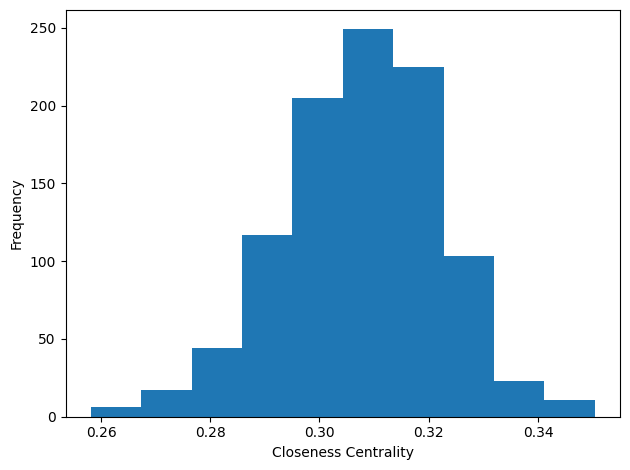

Η μέση κεντρικότητα της εγγύτητας είναι 0.30766634722574426 και η διασπορά της είναι 0.00021039785406767335
Χρόνος εκτέλεσης:  1.2553462982177734
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της εγγύτητας των κόμβων είναι η εξής:


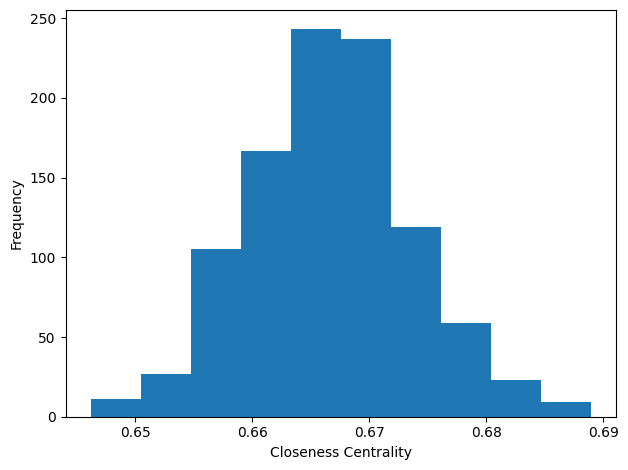

Η μέση κεντρικότητα της εγγύτητας είναι 0.6667266807819604 και η διασπορά της είναι 4.898274405301725e-05
Χρόνος εκτέλεσης:  0.5130410194396973
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της εγγύτητας των κόμβων είναι η εξής:


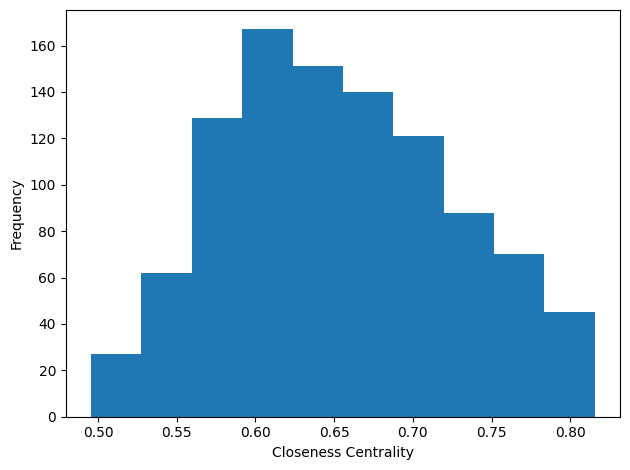

Η μέση κεντρικότητα της εγγύτητας είναι 0.6536192326163329 και η διασπορά της είναι 0.005164836102563547
Χρόνος εκτέλεσης:  6.595770359039307
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της εγγύτητας των κόμβων είναι η εξής:


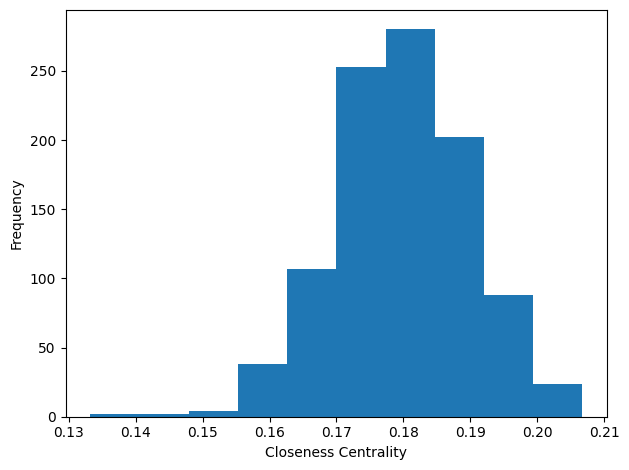

Η μέση κεντρικότητα της εγγύτητας είναι 0.17975176876880428 και η διασπορά της είναι 0.00010114143276225512
Χρόνος εκτέλεσης:  0.7087674140930176
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της εγγύτητας των κόμβων είναι η εξής:


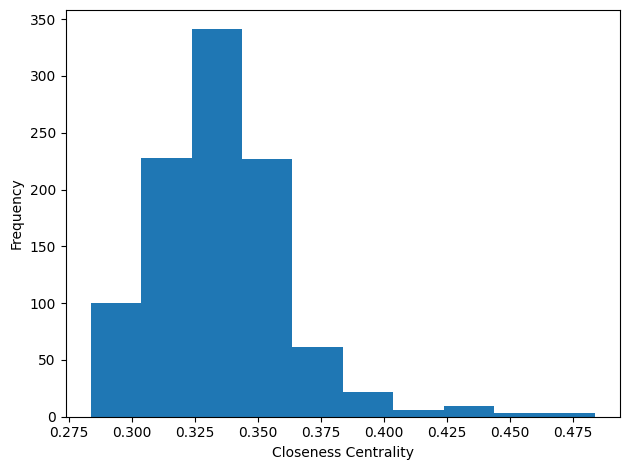

Η μέση κεντρικότητα της εγγύτητας είναι 0.3357814883418606 και η διασπορά της είναι 0.0007205136617076075
Χρόνος εκτέλεσης:  0.7100062370300293
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της εγγύτητας των κόμβων είναι η εξής:


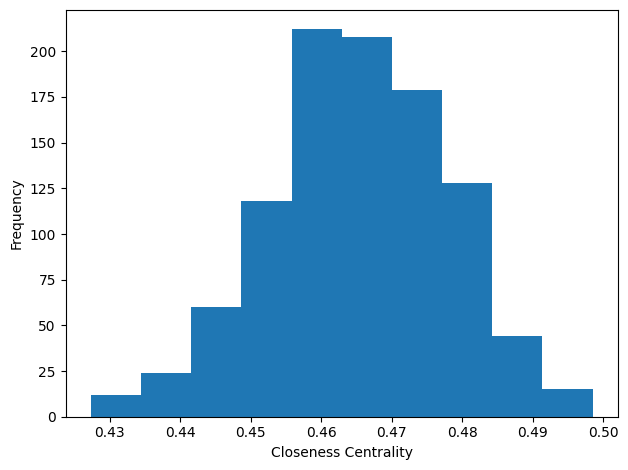

Η μέση κεντρικότητα της εγγύτητας είναι 0.46541352659517615 και η διασπορά της είναι 0.00015954128163907412
Χρόνος εκτέλεσης:  0.6729264259338379
 
Η διασπορά της μετρικής Closeness Centrality είναι:  0.03227104286482692 και ο συντελεστής διασποράς εἰναι:  0.41313357289579955
Ο συνολικός χρόνος υπολογισμού της μετρικής Closeness Centrality είναι:  10.455857753753662 δευτερόλεπτα


In [16]:
ccen_variance = []
ccen_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_closeness(RG_ER)
ccen_variance.append(a)
ccen_time = ccen_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_closeness(RG_G)
ccen_variance.append(a)
ccen_time = ccen_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_closeness(RGG)
ccen_variance.append(a)
ccen_time = ccen_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_closeness(SW)
ccen_variance.append(a)
ccen_time = ccen_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_closeness(SF)
ccen_variance.append(a)
ccen_time = ccen_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_closeness(WA)
ccen_variance.append(a)
ccen_time = ccen_time + b
print(" ")

print("Η διασπορά της μετρικής Closeness Centrality είναι: ", np.var(ccen_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(ccen_variance))/np.mean(ccen_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Closeness Centrality είναι: ", ccen_time, "δευτερόλεπτα")

## **Information Centrality**

In [17]:
def find_information(G):
  start = time.time()
  inlist = []
  in_centr = nx.information_centrality(G)
  print("Η κατανομή της κεντρικότητας της πληροφορίας των κόμβων είναι η εξής:")
  fig = plt.hist(in_centr.values(), bins=10)
  plt.xlabel('Information Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in in_centr.values():
    inlist.append(value)
  degaverage = np.average(inlist)
  degvariance = np.var(inlist)
  print("Η μέση κεντρικότητα της πληροφορίας είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της πληροφορίας των κόμβων είναι η εξής:


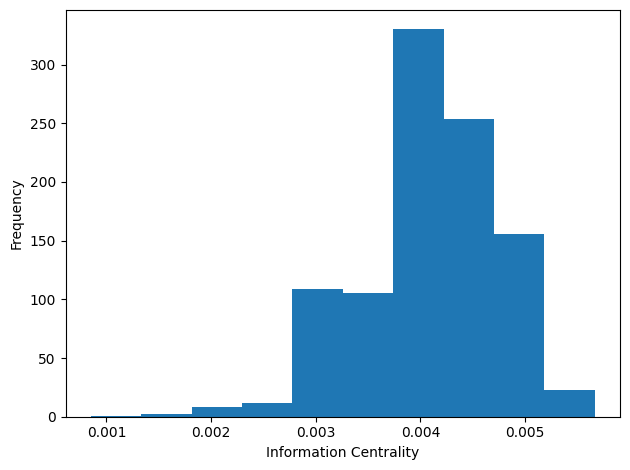

Η μέση κεντρικότητα της πληροφορίας είναι 0.004094544072829041 και η διασπορά της είναι 4.161812807562764e-07
Χρόνος εκτέλεσης:  2.7074596881866455
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της πληροφορίας των κόμβων είναι η εξής:


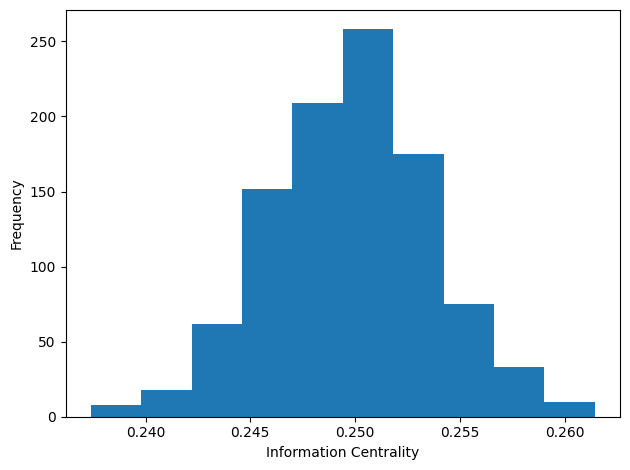

Η μέση κεντρικότητα της πληροφορίας είναι 0.24979899303817404 και η διασπορά της είναι 1.544003574818729e-05
Χρόνος εκτέλεσης:  4.750985383987427
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της πληροφορίας των κόμβων είναι η εξής:


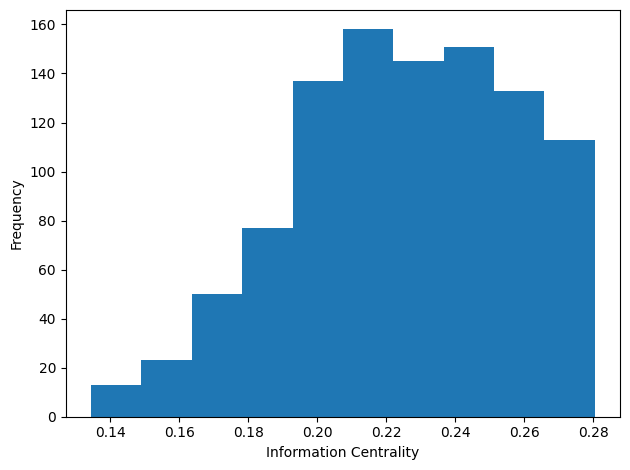

Η μέση κεντρικότητα της πληροφορίας είναι 0.2248634856581299 και η διασπορά της είναι 0.001027458539374129
Χρόνος εκτέλεσης:  4.456528425216675
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της πληροφορίας των κόμβων είναι η εξής:


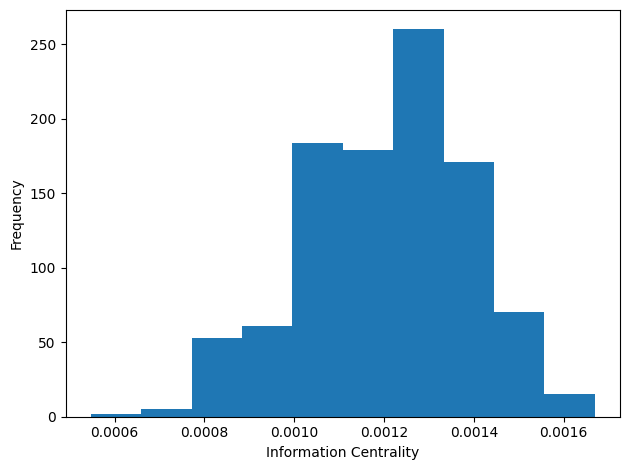

Η μέση κεντρικότητα της πληροφορίας είναι 0.001205156399718676 και η διασπορά της είναι 3.185233921403251e-08
Χρόνος εκτέλεσης:  1.0839354991912842
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της πληροφορίας των κόμβων είναι η εξής:


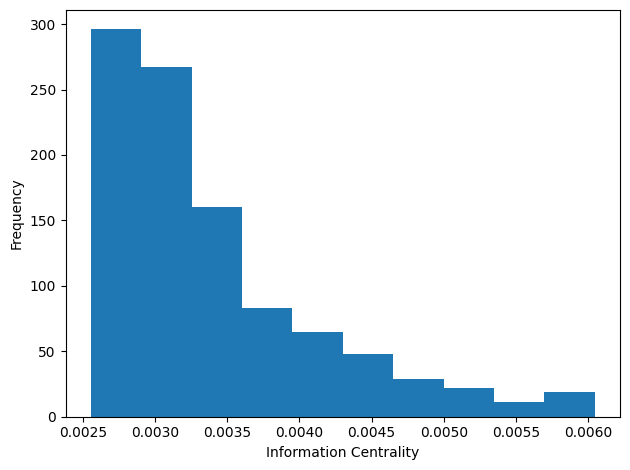

Η μέση κεντρικότητα της πληροφορίας είναι 0.0033934220967552385 και η διασπορά της είναι 5.799633962677694e-07
Χρόνος εκτέλεσης:  2.804133176803589
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της πληροφορίας των κόμβων είναι η εξής:


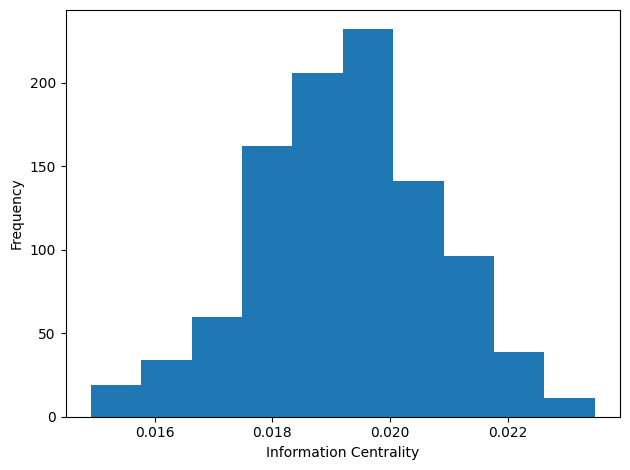

Η μέση κεντρικότητα της πληροφορίας είναι 0.019276880501623718 και η διασπορά της είναι 2.394874483180643e-06
Χρόνος εκτέλεσης:  2.6396214962005615
 
Η διασπορά της μετρικής Information Centrality είναι:  0.011876314435412485 και ο συντελεστής διασποράς εἰναι:  1.3008928998989369
Ο συνολικός χρόνος υπολογισμού της μετρικής Information Centrality είναι:  18.44266366958618 δευτερόλεπτα


In [18]:
ic_variance = []
ic_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_information(RG_ER)
ic_variance.append(a)
ic_time = ic_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_information(RG_G)
ic_variance.append(a)
ic_time = ic_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_information(RGG)
ic_variance.append(a)
ic_time = ic_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_information(SW)
ic_variance.append(a)
ic_time = ic_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_information(SF)
ic_variance.append(a)
ic_time = ic_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_information(WA)
ic_variance.append(a)
ic_time = ic_time + b
print(" ")

print("Η διασπορά της μετρικής Information Centrality είναι: ", np.var(ic_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(ic_variance))/np.mean(ic_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Information Centrality είναι: ", ic_time, "δευτερόλεπτα")

## **Routing Centrality**

Δεν βρήκα κάποια έτοιμη υλοποίηση οπότε δεν θα χρησιμοποιηθεί. Έτσι κι αλλιώς είναι σαν το betweennness οπότε μάλλον δεν χρειάζεται.

Νομίζω ότι είναι το current flow betweenness τελικά! Το υλοποιώ:

In [19]:
def find_routing(G):
  start = time.time()
  rolist = []
  ro_centr = nx.current_flow_betweenness_centrality(G)
  print("Η κατανομή της κεντρικότητας της δρομολόγησης των κόμβων είναι η εξής:")
  fig = plt.hist(ro_centr.values(), bins=10)
  plt.xlabel('Routing Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in ro_centr.values():
    rolist.append(value)
  degaverage = np.average(rolist)
  degvariance = np.var(rolist)
  print("Η μέση κεντρικότητα της δρομολόγησης είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της δρομολόγησης των κόμβων είναι η εξής:


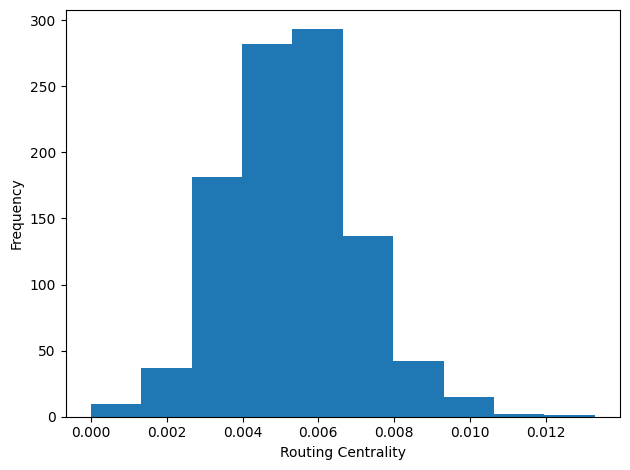

Η μέση κεντρικότητα της δρομολόγησης είναι 0.005271802766197513 και η διασπορά της είναι 2.9094472675204434e-06
Χρόνος εκτέλεσης:  27.09882616996765
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της δρομολόγησης των κόμβων είναι η εξής:


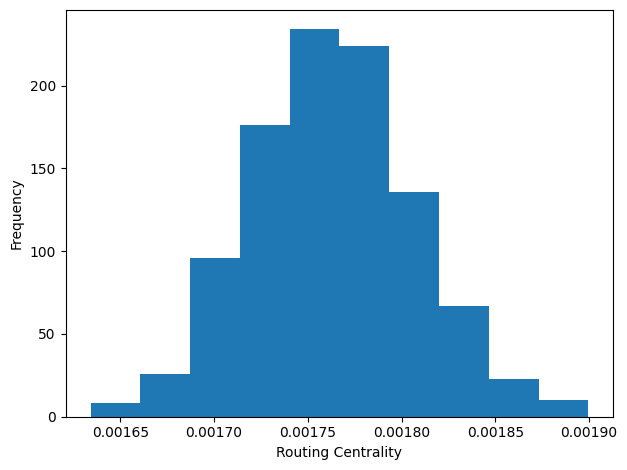

Η μέση κεντρικότητα της δρομολόγησης είναι 0.0017633399022119053 και η διασπορά της είναι 1.9126974662582625e-09
Χρόνος εκτέλεσης:  1108.3933718204498
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της δρομολόγησης των κόμβων είναι η εξής:


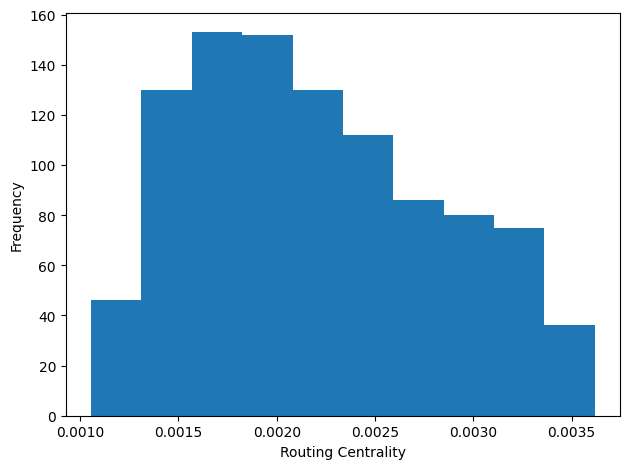

Η μέση κεντρικότητα της δρομολόγησης είναι 0.0022032353582967 και η διασπορά της είναι 3.8748323980435596e-07
Χρόνος εκτέλεσης:  880.3425397872925
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της δρομολόγησης των κόμβων είναι η εξής:


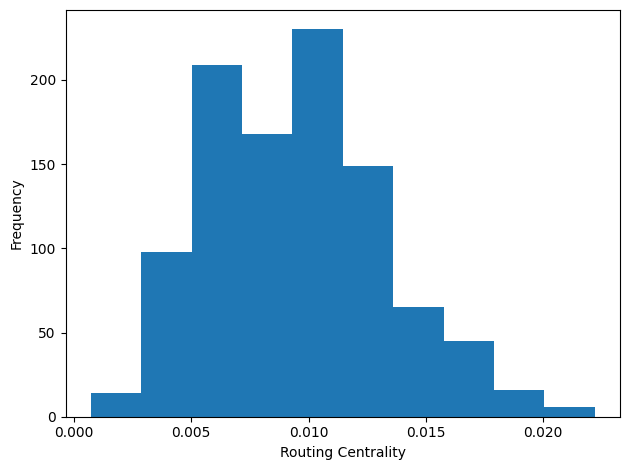

Η μέση κεντρικότητα της δρομολόγησης είναι 0.0094737103332443 και η διασπορά της είναι 1.412988236687443e-05
Χρόνος εκτέλεσης:  6.0614118576049805
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της δρομολόγησης των κόμβων είναι η εξής:


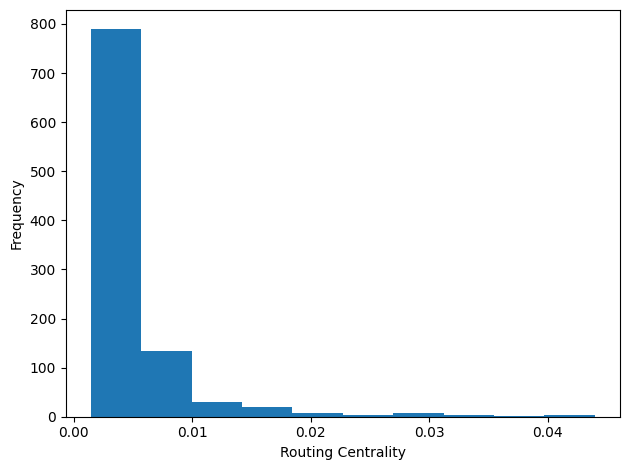

Η μέση κεντρικότητα της δρομολόγησης είναι 0.004938341681705599 και η διασπορά της είναι 2.508488777309391e-05
Χρόνος εκτέλεσης:  22.608720302581787
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της δρομολόγησης των κόμβων είναι η εξής:


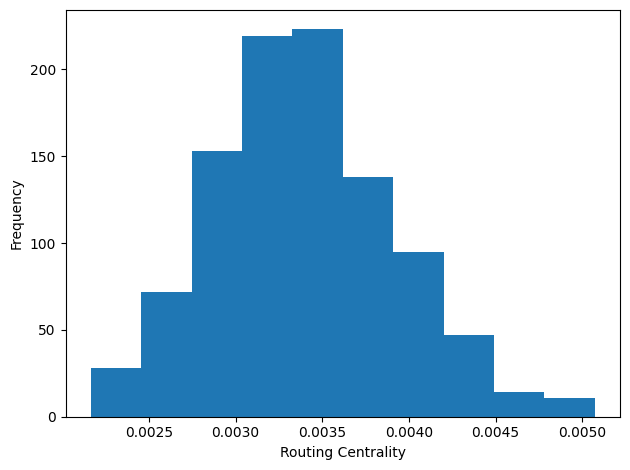

Η μέση κεντρικότητα της δρομολόγησης είναι 0.0033896921682122338 και η διασπορά της είναι 2.708748229412303e-07
Χρόνος εκτέλεσης:  90.04844069480896
 
Η διασπορά της μετρικής Routing Centrality είναι:  6.587094818627376e-06 και ο συντελεστής διασποράς εἰναι:  0.5694945309732309
Ο συνολικός χρόνος υπολογισμού της μετρικής Routing Centrality είναι:  2134.5533106327057 δευτερόλεπτα


In [20]:
rc_variance = []
rc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_routing(RG_ER)
rc_variance.append(a)
rc_time = rc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_routing(RG_G)
rc_variance.append(a)
rc_time = rc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_routing(RGG)
rc_variance.append(a)
rc_time = rc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_routing(SW)
rc_variance.append(a)
rc_time = rc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_routing(SF)
rc_variance.append(a)
rc_time = rc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_routing(WA)
rc_variance.append(a)
rc_time = rc_time + b
print(" ")

print("Η διασπορά της μετρικής Routing Centrality είναι: ", np.var(rc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(rc_variance))/np.mean(rc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Routing Centrality είναι: ", rc_time, "δευτερόλεπτα")

## **Bridging Centrality**

Κάποιες πηγές:

https://www.centiserver.ir/centrality/Bridging_Centrality/ (Θεωρία)

https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=http://www.cse.buffalo.edu/tech-reports/2006-05.pdf&ved=2ahUKEwjVodSEqYyKAxUvSPEDHY5mBTIQFnoECEIQAw&usg=AOvVaw3BmqMdzEypOymgI8P4KjmE (Θεωρία)

https://github.com/StephanyRajeh/ModularCentralities/blob/master/BridgingCentralityCode.py (Υλοποίηση)

In [21]:
# Όχι δικό μου!

# ---------------------------------------------- Helper functions -----------------------------------------------------
from networkx.algorithms.centrality import *

def getNeighborsOfEachNode(g):
    dict_neighbors=dict()
    for i in g:
        dict_neighbors[i]=[]
        for j in g[i]:
            dict_neighbors[i].append(j)
    return dict_neighbors


def degree_conf(g):
    #list_nodes = g.nodes ()  # list of nodes
    dict_degree = dict()  # nodes and their degree centrality

    for i in g:
        dict_degree[i] = len(g[i])

    return dict_degree


# ---------------------------------------------- Main functions -----------------------------------------------------
def bridging_centrality(g):
	n = getNeighborsOfEachNode(g) # call external function

	dict_deno = {}
	deno = list()

	dict_deg = {}
	dict_deg = degree_conf(g)

	dict_bet = {}
	dict_bet = betweenness_centrality(g)

	for i in n: # for each node
		for j in n[i]: # for each of its neighbors
			x = 1/dict_deg[j]
			deno.append(x)
		dict_deno[i] = deno
		deno = list()  # empty list for new node


	sum_temp = 0
	dict_deno_sum = {}
	for i in dict_deno:
		dict_deno_sum[i]=0
		for j in dict_deno[i]:
			sum_temp = j + sum_temp
		dict_deno_sum[i]= sum_temp
		sum_temp=0


	bridgecoeff = {}
	for i in n: # for each node
		bridgecoeff[i]= (1/dict_deg[i])/dict_deno_sum[i]


	dict_bridgecentrality = {}
	for i in n:
		dict_bridgecentrality[i]=bridgecoeff[i]*dict_bet[i]

	return dict_bridgecentrality

In [22]:
def find_bridging(G):
  start = time.time()
  brlist = []
  br_centr = bridging_centrality(G)
  print("Η κατανομή της κεντρικότητας της γεφύρωσης των κόμβων είναι η εξής:")
  fig = plt.hist(br_centr.values(), bins=10)
  plt.xlabel('Bridging Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in br_centr.values():
    brlist.append(value)
  degaverage = np.average(brlist)
  degvariance = np.var(brlist)
  print("Η μέση κεντρικότητα της γεφύρωσης είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της γεφύρωσης των κόμβων είναι η εξής:


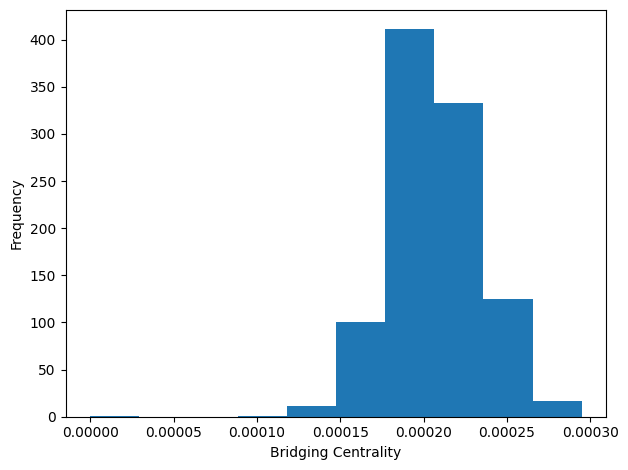

Η μέση κεντρικότητα της γεφύρωσης είναι 0.00020661308839200283 και η διασπορά της είναι 7.868131601252816e-10
Χρόνος εκτέλεσης:  4.1006786823272705
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της γεφύρωσης των κόμβων είναι η εξής:


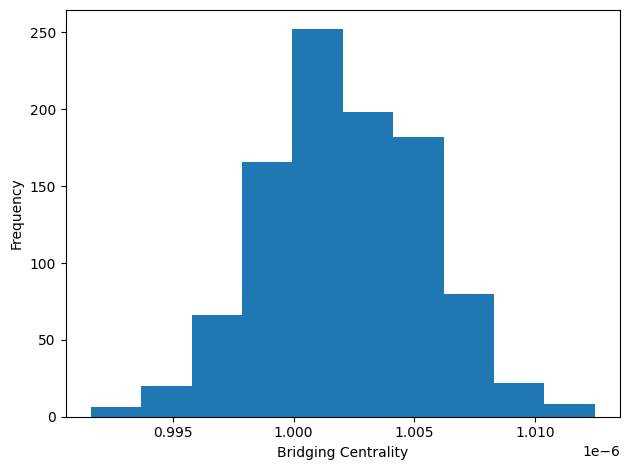

Η μέση κεντρικότητα της γεφύρωσης είναι 1.0021173119644208e-06 και η διασπορά της είναι 1.0828755351054025e-17
Χρόνος εκτέλεσης:  92.82712626457214
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της γεφύρωσης των κόμβων είναι η εξής:


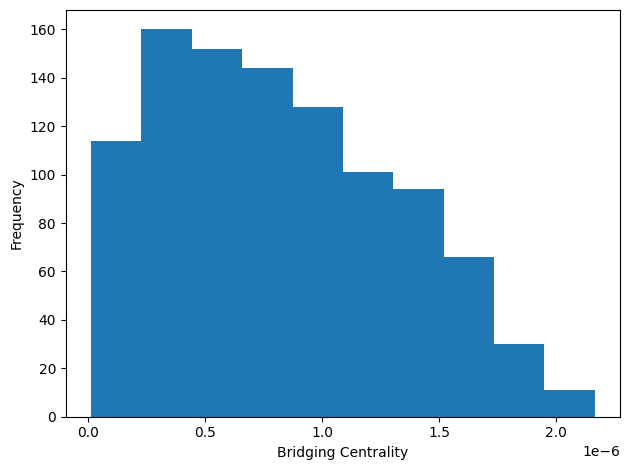

Η μέση κεντρικότητα της γεφύρωσης είναι 8.252184404239826e-07 και η διασπορά της είναι 2.481635451754807e-13
Χρόνος εκτέλεσης:  70.04198789596558
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της γεφύρωσης των κόμβων είναι η εξής:


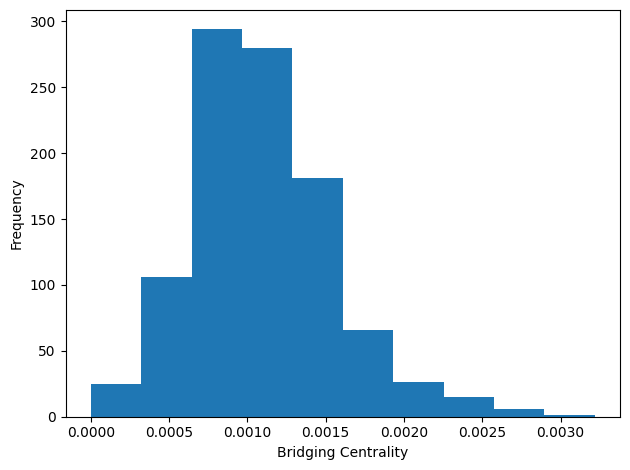

Η μέση κεντρικότητα της γεφύρωσης είναι 0.0010946462422016885 και η διασπορά της είναι 2.0489407811970058e-07
Χρόνος εκτέλεσης:  3.249695301055908
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της γεφύρωσης των κόμβων είναι η εξής:


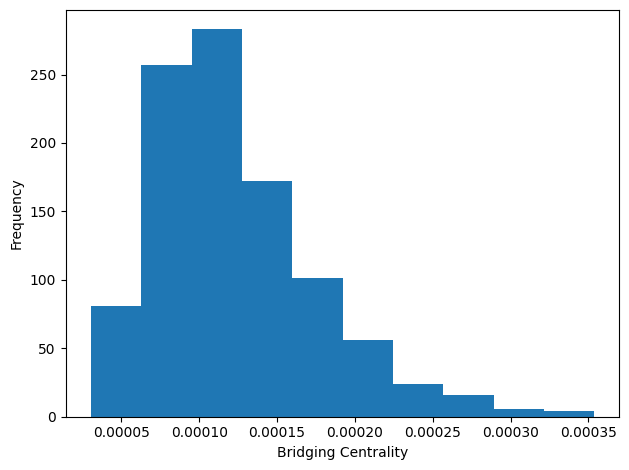

Η μέση κεντρικότητα της γεφύρωσης είναι 0.00012299359335913747 και η διασπορά της είναι 2.7357064036023744e-09
Χρόνος εκτέλεσης:  4.072818279266357
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της γεφύρωσης των κόμβων είναι η εξής:


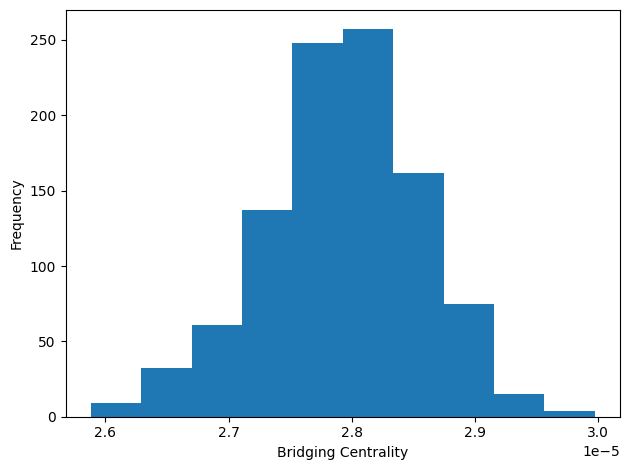

Η μέση κεντρικότητα της γεφύρωσης είναι 2.7920902327579446e-05 και η διασπορά της είναι 4.071442575166094e-13
Χρόνος εκτέλεσης:  9.189207315444946
 
Η διασπορά της μετρική Bridging Centrality είναι:  1.5074913666907764e-07 και ο συντελεστής διασποράς εἰναι:  1.6021896193362826
Ο συνολικός χρόνος υπολογισμού της μετρικής Bridging Centrality είναι:  183.4815137386322 δευτερόλεπτα


In [23]:
brc_variance = []
brc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_bridging(RG_ER)
brc_variance.append(a)
brc_time = brc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_bridging(RG_G)
brc_variance.append(a)
brc_time = brc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_bridging(RGG)
brc_variance.append(a)
brc_time = brc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_bridging(SW)
brc_variance.append(a)
brc_time = brc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_bridging(SF)
brc_variance.append(a)
brc_time = brc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_bridging(WA)
brc_variance.append(a)
brc_time = brc_time + b
print(" ")

print("Η διασπορά της μετρική Bridging Centrality είναι: ", np.var(brc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(brc_variance))/np.mean(brc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Bridging Centrality είναι: ", brc_time, "δευτερόλεπτα")

## **Spectral Centrality**

Προσπάθησα να το υλοποιήσω χρησιμοποιώντας το networkit όπως φαίνεται παρακάτω. Φαίνεται όμως πως υπάρχει κάποιο πρόβλημα στην υλοποίηση της αντίστοιχης συνάρτησης της βιβλιοθήκης. Δεν βρήκα κάποια άλλη υλοποίηση, αλλά δεν πειράζει γιατί όπως καταλαβαίνω είναι παρόμοιο με το eignevector centrality.

In [24]:
#!pip3 install networkit



```
from networkit import *

def find_spectral(G):
    try:
        splist = []
        g = centrality.SpectralCentrality(G)
        g.run()
        sp_centr = g.scores()
        print("Η κατανομή της φασματικής κεντρικότητα των κόμβων είναι η εξής:")
        # Convert the dictionary values to a list before plotting the histogram
        fig = plt.hist(list(sp_centr.values()), bins=10)
        plt.xlabel('Spectral Centrality')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
        for value in sp_centr.values():
            splist.append(value)
        degaverage = np.average(splist)
        degvariance = np.var(splist)
        print("Η μέση φασματική κεντρικότητα είναι", degaverage, "και η διασπορά της είναι", degvariance)
    except TypeError as e:
        print(f"An error occurred during spectral centrality calculation: {e}")
        print("This might be due to an issue within the Networkit library or the graph structure.")
        print("Consider checking the graph for any inconsistencies or unexpected properties.")
```



## **Eigenvector Centrality**

In [25]:
def find_eigenvector(G):
  start = time.time()
  eilist = []
  ei_centr = eigenvector_centrality(G)
  print("Η κατανομή της κεντρικότητας των ιδιοδιανυσμάτων των κόμβων είναι η εξής:")
  fig = plt.hist(ei_centr.values(), bins=10)
  plt.xlabel('Eigenvector Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in ei_centr.values():
    eilist.append(value)
  degaverage = np.average(eilist)
  degvariance = np.var(eilist)
  print("Η μέση κεντρικότητα των ιδιοδιανυσμάτων είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των ιδιοδιανυσμάτων των κόμβων είναι η εξής:


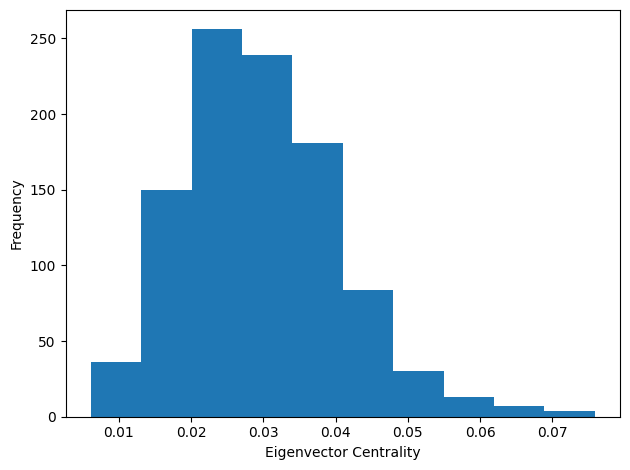

Η μέση κεντρικότητα των ιδιοδιανυσμάτων είναι 0.029711359165033535 και η διασπορά της είναι 0.00011723513656637777
Χρόνος εκτέλεσης:  0.21601033210754395
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των ιδιοδιανυσμάτων των κόμβων είναι η εξής:


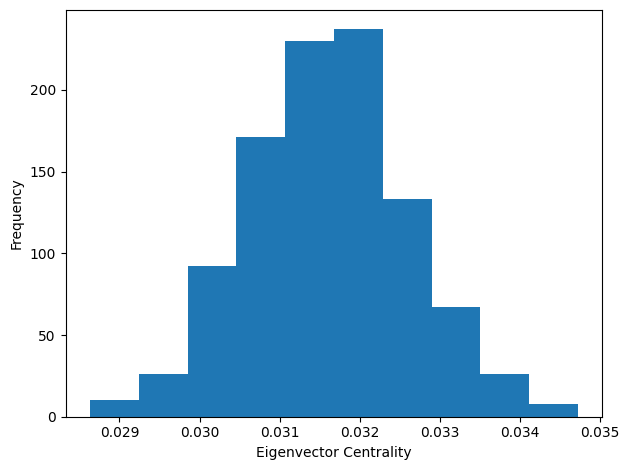

Η μέση κεντρικότητα των ιδιοδιανυσμάτων είναι 0.031607153030032545 και η διασπορά της είναι 9.8787733610468e-07
Χρόνος εκτέλεσης:  0.48607611656188965
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των ιδιοδιανυσμάτων των κόμβων είναι η εξής:


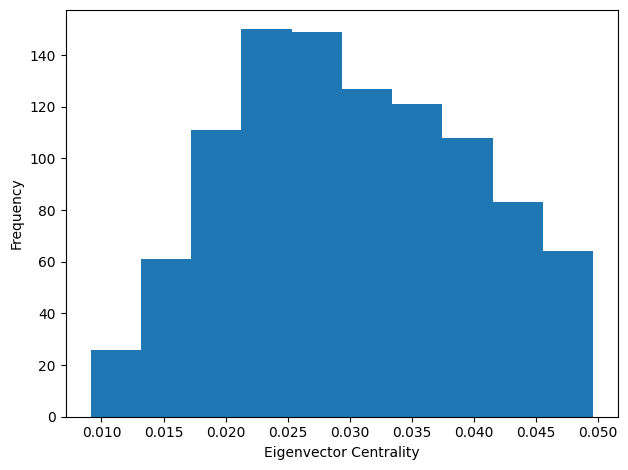

Η μέση κεντρικότητα των ιδιοδιανυσμάτων είναι 0.030131944577512833 και η διασπορά της είναι 9.206591597769497e-05
Χρόνος εκτέλεσης:  0.9402732849121094
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των ιδιοδιανυσμάτων των κόμβων είναι η εξής:


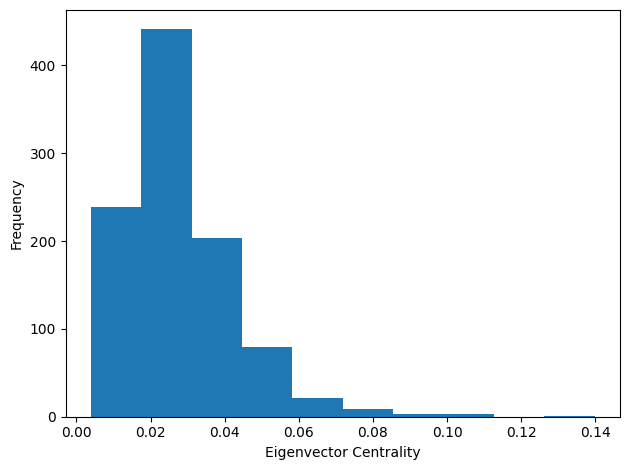

Η μέση κεντρικότητα των ιδιοδιανυσμάτων είναι 0.027944869196380184 και η διασπορά της είναι 0.0002190842855972019
Χρόνος εκτέλεσης:  0.26578378677368164
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των ιδιοδιανυσμάτων των κόμβων είναι η εξής:


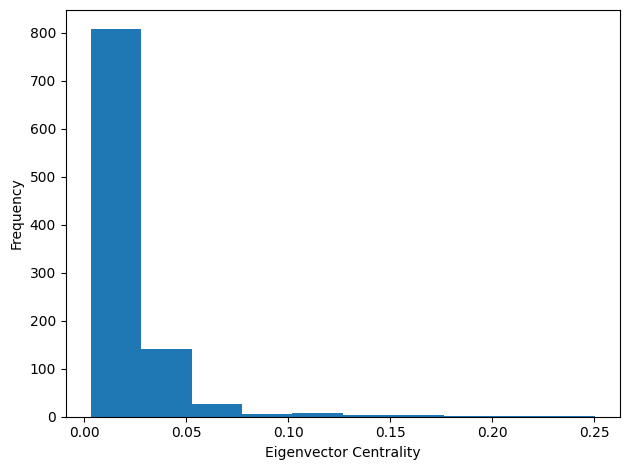

Η μέση κεντρικότητα των ιδιοδιανυσμάτων είναι 0.021903346719285274 και η διασπορά της είναι 0.0005202434024947748
Χρόνος εκτέλεσης:  0.20020794868469238
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των ιδιοδιανυσμάτων των κόμβων είναι η εξής:


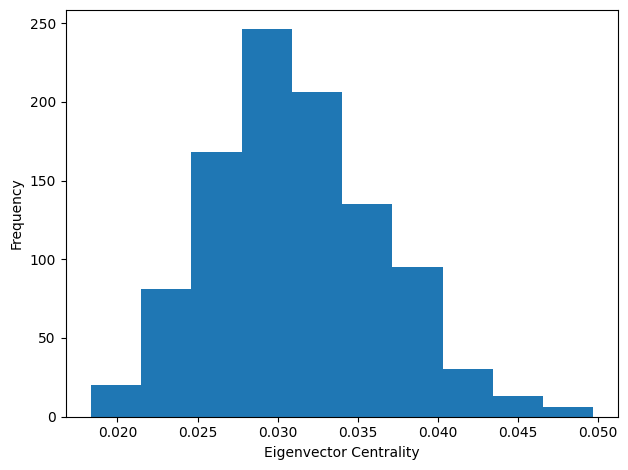

Η μέση κεντρικότητα των ιδιοδιανυσμάτων είναι 0.031170828609064914 και η διασπορά της είναι 2.8379443824300578e-05
Χρόνος εκτέλεσης:  0.2255997657775879
 
Η διασπορά της μετρικής Eigenvector Centrality είναι:  1.0730409763297331e-05 και ο συντελεστής διασποράς εἰναι:  0.11395859762294343
Ο συνολικός χρόνος υπολογισμού της μετρικής Eigenvector Centrality είναι:  2.333951234817505 δευτερόλεπτα


In [26]:
ec_variance = []
ec_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_eigenvector(RG_ER)
ec_variance.append(a)
ec_time = ec_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_eigenvector(RG_G)
ec_variance.append(a)
ec_time = ec_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_eigenvector(RGG)
ec_variance.append(a)
ec_time = ec_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_eigenvector(SW)
ec_variance.append(a)
ec_time = ec_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_eigenvector(SF)
ec_variance.append(a)
ec_time = ec_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_eigenvector(WA)
ec_variance.append(a)
ec_time = ec_time + b
print(" ")

print("Η διασπορά της μετρικής Eigenvector Centrality είναι: ", np.var(ec_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(ec_variance))/np.mean(ec_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Eigenvector Centrality είναι: ", ec_time, "δευτερόλεπτα")

## **Katz Centrality**

In [27]:
def find_katz(G):
  start = time.time()
  kalist = []
  ka_centr = eigenvector_centrality(G)
  print("Η κατανομή της κεντρικότητας katz των κόμβων είναι η εξής:")
  fig = plt.hist(ka_centr.values(), bins=10)
  plt.xlabel('Katz Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in ka_centr.values():
    kalist.append(value)
  degaverage = np.average(kalist)
  degvariance = np.var(kalist)
  print("Η μέση κεντρικότητα katz είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας katz των κόμβων είναι η εξής:


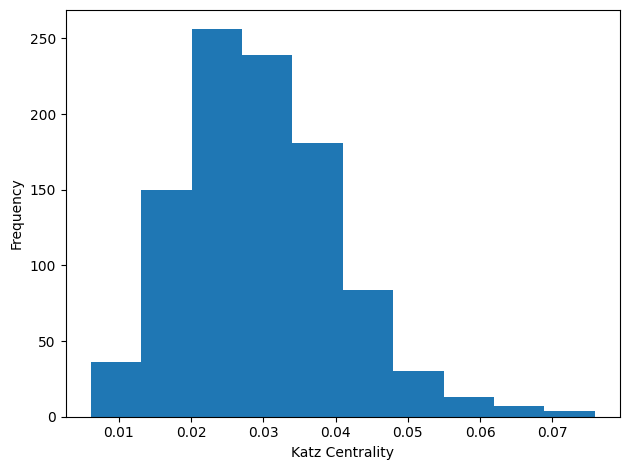

Η μέση κεντρικότητα katz είναι 0.029711359165033535 και η διασπορά της είναι 0.00011723513656637777
Χρόνος εκτέλεσης:  0.1719977855682373
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας katz των κόμβων είναι η εξής:


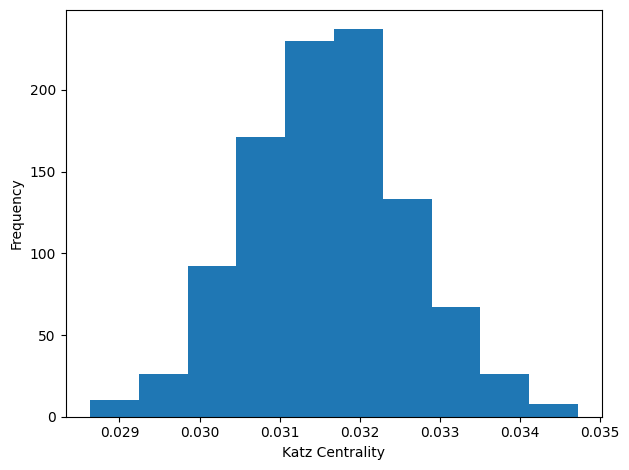

Η μέση κεντρικότητα katz είναι 0.031607153030032545 και η διασπορά της είναι 9.8787733610468e-07
Χρόνος εκτέλεσης:  0.47862672805786133
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας katz των κόμβων είναι η εξής:


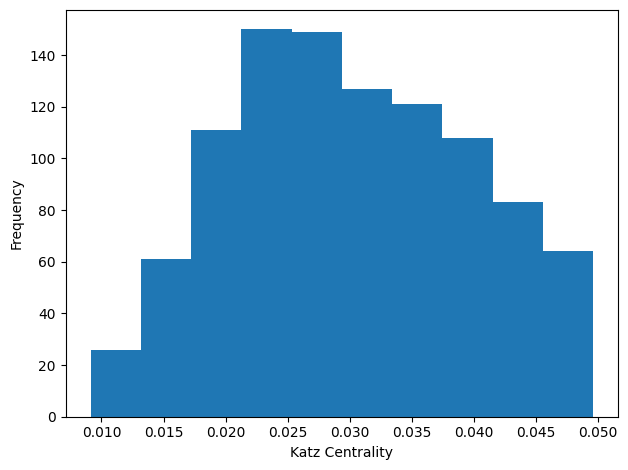

Η μέση κεντρικότητα katz είναι 0.030131944577512833 και η διασπορά της είναι 9.206591597769497e-05
Χρόνος εκτέλεσης:  0.9007365703582764
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας katz των κόμβων είναι η εξής:


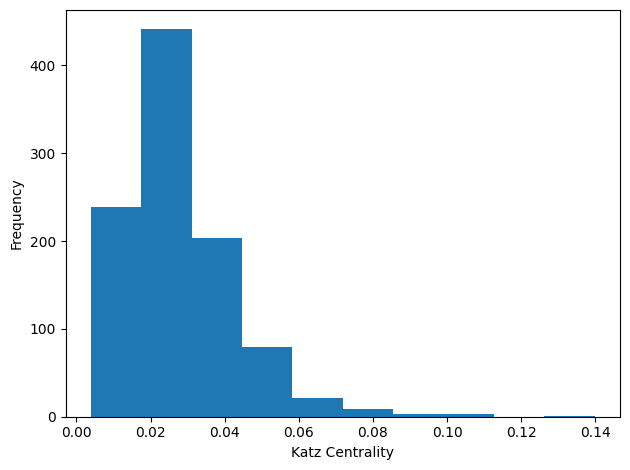

Η μέση κεντρικότητα katz είναι 0.027944869196380184 και η διασπορά της είναι 0.0002190842855972019
Χρόνος εκτέλεσης:  0.385143518447876
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας katz των κόμβων είναι η εξής:


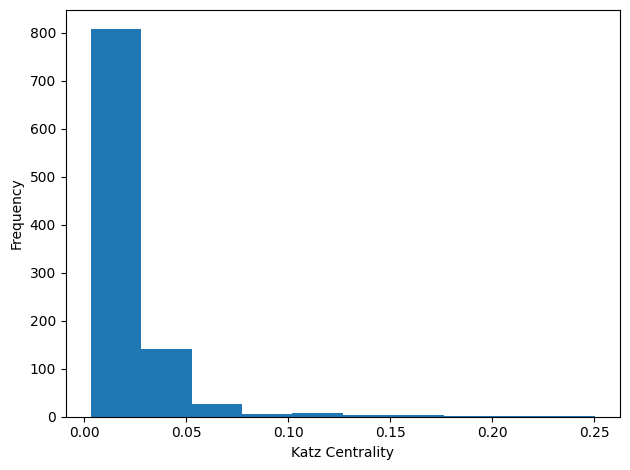

Η μέση κεντρικότητα katz είναι 0.021903346719285274 και η διασπορά της είναι 0.0005202434024947748
Χρόνος εκτέλεσης:  0.27103495597839355
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας katz των κόμβων είναι η εξής:


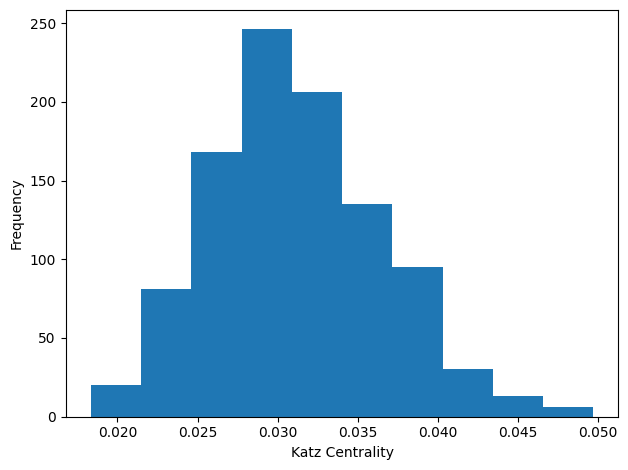

Η μέση κεντρικότητα katz είναι 0.031170828609064914 και η διασπορά της είναι 2.8379443824300578e-05
Χρόνος εκτέλεσης:  0.28867530822753906
 
Η διασπορά της μετρικής Katz Centrality είναι:  1.0730409763297331e-05 και ο συντελεστής διασποράς εἰναι:  0.11395859762294343
Ο συνολικός χρόνος υπολογισμού της μετρικής Katz Centrality είναι:  2.4962148666381836 δευτερόλεπτα


In [28]:
kc_variance = []
kc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_katz(RG_ER)
kc_variance.append(a)
kc_time = kc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_katz(RG_G)
kc_variance.append(a)
kc_time = kc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_katz(RGG)
kc_variance.append(a)
kc_time = kc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_katz(SW)
kc_variance.append(a)
kc_time = kc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_katz(SF)
kc_variance.append(a)
kc_time = kc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_katz(WA)
kc_variance.append(a)
kc_time = kc_time + b
print(" ")

print("Η διασπορά της μετρικής Katz Centrality είναι: ", np.var(kc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(kc_variance))/np.mean(kc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Katz Centrality είναι: ", kc_time, "δευτερόλεπτα")

## **Laplacian Centrality**

In [29]:
def find_laplacian(G):
  start = time.time()
  lalist = []
  la_centr = laplacian_centrality(G)
  print("Η κατανομή της λαπλασιανής κεντρικότητας των κόμβων είναι η εξής:")
  fig = plt.hist(la_centr.values(), bins=10)
  plt.xlabel('Laplacian Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in la_centr.values():
    lalist.append(value)
  degaverage = np.average(lalist)
  degvariance = np.var(lalist)
  print("Η μέση λαπλασιανή κεντρικότητα είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start



```
#Πάρα πολύ αργό!

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
find_laplacian(RG_ER)
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
find_laplacian(RG_G)
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
find_laplacian(RGG)
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
find_laplacian(SW)
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
find_laplacian(SF)
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
find_laplacian(WA)
print(" ")
```



## **Harmonic Centrality**

In [30]:
def find_harmonic(G):
  start = time.time()
  halist = []
  ha_centr = harmonic_centrality(G)
  print("Η κατανομή της κεντρικότητας των αρμονικών των κόμβων είναι η εξής:")
  fig = plt.hist(ha_centr.values(), bins=10)
  plt.xlabel('Harmonic Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in ha_centr.values():
    halist.append(value)
  degaverage = np.average(halist)
  degvariance = np.var(halist)
  print("Η μέση κεντρικότητα των αρμονικών είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των αρμονικών των κόμβων είναι η εξής:


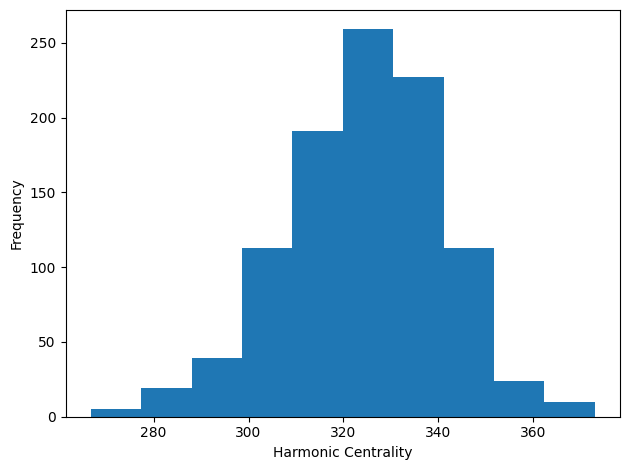

Η μέση κεντρικότητα των αρμονικών είναι 324.48683333333275 και η διασπορά της είναι 276.9138760833164
Χρόνος εκτέλεσης:  1.6171894073486328
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των αρμονικών των κόμβων είναι η εξής:


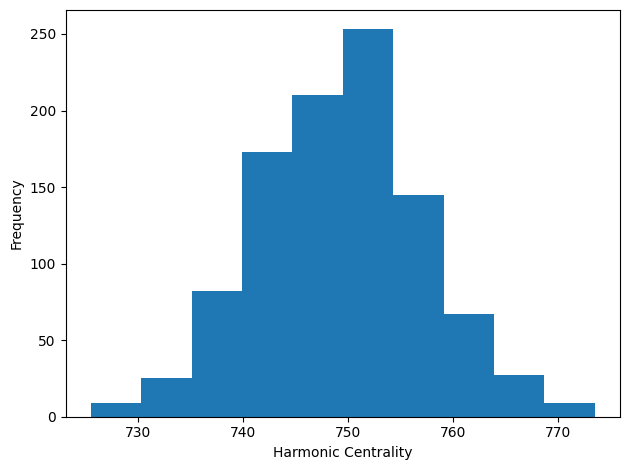

Η μέση κεντρικότητα των αρμονικών είναι 749.235 και η διασπορά της είναι 61.695274999999995
Χρόνος εκτέλεσης:  0.8250985145568848
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των αρμονικών των κόμβων είναι η εξής:


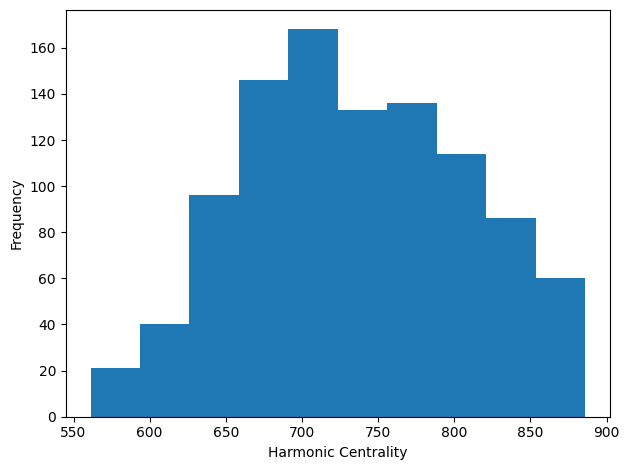

Η μέση κεντρικότητα των αρμονικών είναι 734.7383333333332 και η διασπορά της είναι 5401.682752777781
Χρόνος εκτέλεσης:  7.32170033454895
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των αρμονικών των κόμβων είναι η εξής:


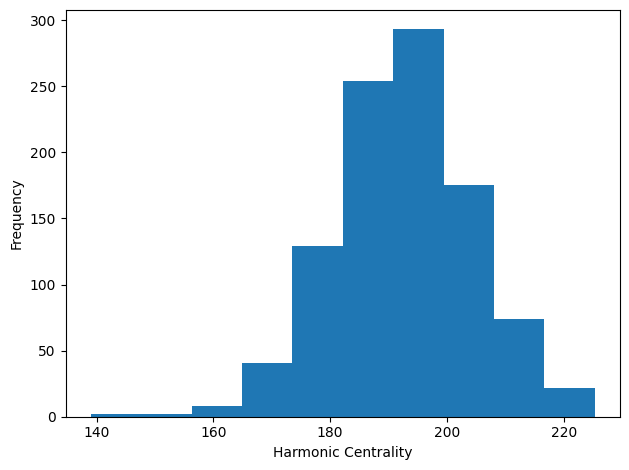

Η μέση κεντρικότητα των αρμονικών είναι 192.48922857142688 και η διασπορά της είναι 141.6378001075876
Χρόνος εκτέλεσης:  0.9687857627868652
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των αρμονικών των κόμβων είναι η εξής:


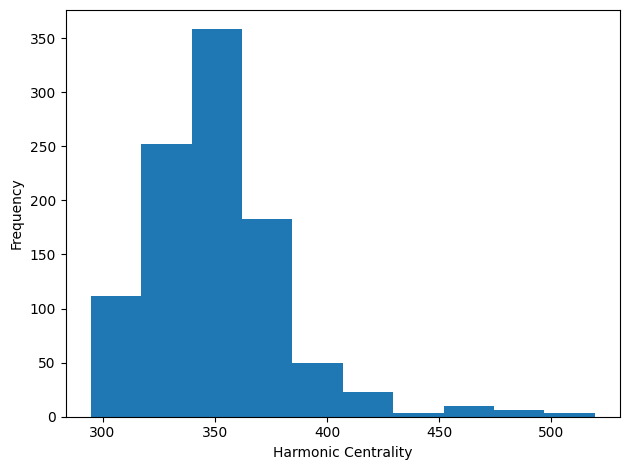

Η μέση κεντρικότητα των αρμονικών είναι 351.0964333333318 και η διασπορά της είναι 928.897095056603
Χρόνος εκτέλεσης:  0.9107046127319336
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας των αρμονικών των κόμβων είναι η εξής:


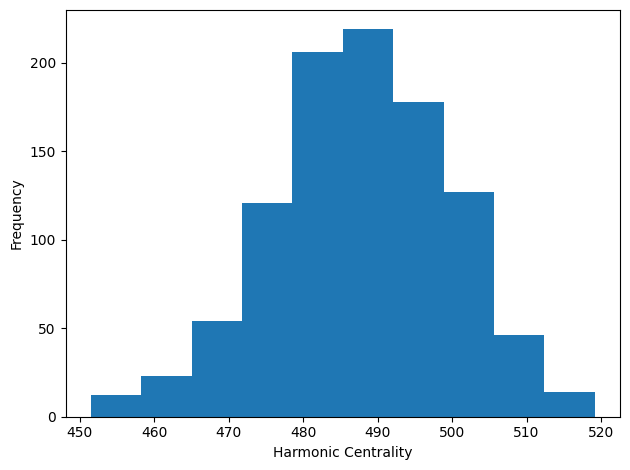

Η μέση κεντρικότητα των αρμονικών είναι 487.89866666666535 και η διασπορά της είναι 141.16517600000742
Χρόνος εκτέλεσης:  1.3510830402374268
 
Η διασπορά της μετρικής Harmonic Centrality είναι:  43439.50059657827 και ο συντελεστής διασποράς εἰναι:  0.44033561179785397
Ο συνολικός χρόνος υπολογισμού της μετρικής Harmonic Centrality είναι:  12.994561672210693 δευτερόλεπτα


In [31]:
hc_variance = []
hc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_harmonic(RG_ER)
hc_variance.append(a)
hc_time = hc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_harmonic(RG_G)
hc_variance.append(a)
hc_time = hc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_harmonic(RGG)
hc_variance.append(a)
hc_time = hc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_harmonic(SW)
hc_variance.append(a)
hc_time = hc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_harmonic(SF)
hc_variance.append(a)
hc_time = hc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_harmonic(WA)
hc_variance.append(a)
hc_time = hc_time + b
print(" ")

print("Η διασπορά της μετρικής Harmonic Centrality είναι: ", np.var(hc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(hc_variance))/np.mean(hc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Harmonic Centrality είναι: ", hc_time, "δευτερόλεπτα")

## **Percolation Centrality**

In [32]:
def find_percolation(G):
  start = time.time()
  pelist = []
  pe_centr = percolation_centrality(G)
  print("Η κατανομή της κεντρικότητας της διήθησης των κόμβων είναι η εξής:")
  fig = plt.hist(pe_centr.values(), bins=10)
  plt.xlabel('Percolation Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in pe_centr.values():
    pelist.append(value)
  degaverage = np.average(pelist)
  degvariance = np.var(pelist)
  print("Η μέση κεντρικότητα της διήθησης είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της διήθησης των κόμβων είναι η εξής:


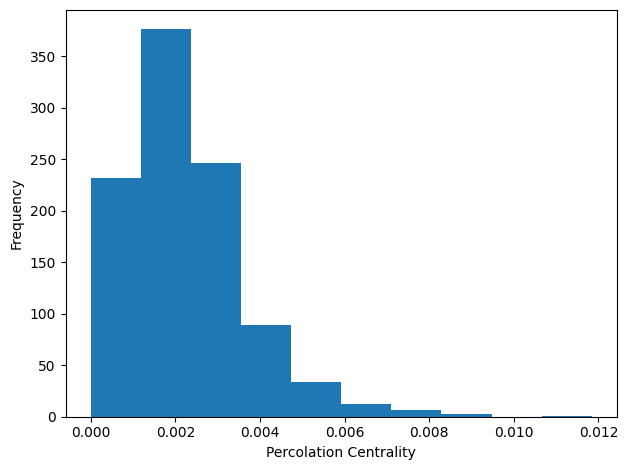

Η μέση κεντρικότητα της διήθησης είναι 0.0022621419014204574 και η διασπορά της είναι 2.0092979974593767e-06
Χρόνος εκτέλεσης:  4.967882394790649
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της διήθησης των κόμβων είναι η εξής:


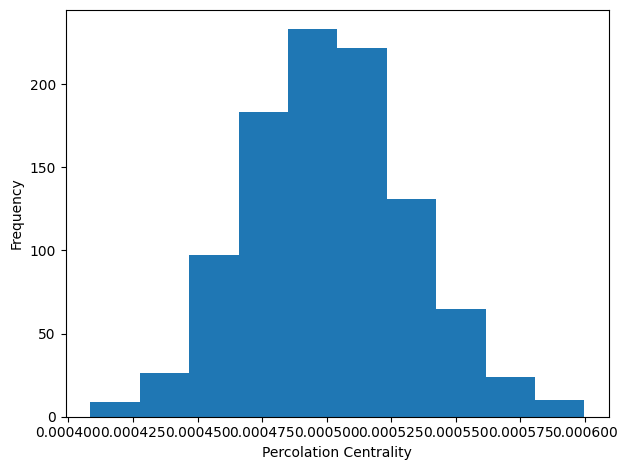

Η μέση κεντρικότητα της διήθησης είναι 0.0005010320942184664 και η διασπορά της είναι 1.0077930076579294e-09
Χρόνος εκτέλεσης:  92.28218984603882
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της διήθησης των κόμβων είναι η εξής:


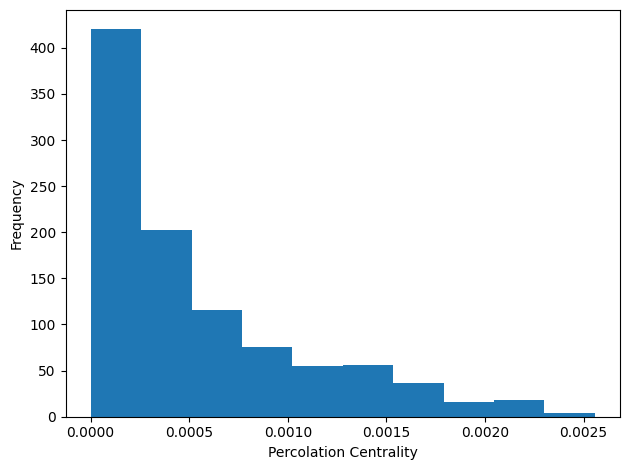

Η μέση κεντρικότητα της διήθησης είναι 0.0005496538622791127 και η διασπορά της είναι 3.013795693628346e-07
Χρόνος εκτέλεσης:  70.72999596595764
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της διήθησης των κόμβων είναι η εξής:


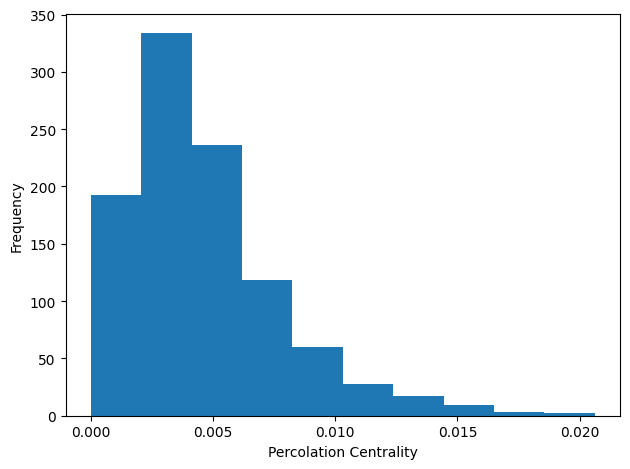

Η μέση κεντρικότητα της διήθησης είναι 0.004590295706528168 και η διασπορά της είναι 9.929874318235833e-06
Χρόνος εκτέλεσης:  3.472291946411133
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της διήθησης των κόμβων είναι η εξής:


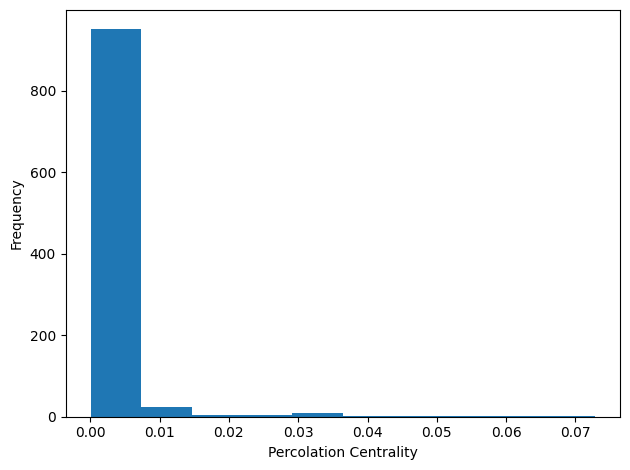

Η μέση κεντρικότητα της διήθησης είναι 0.0019999618857334278 και η διασπορά της είναι 3.610975209860545e-05
Χρόνος εκτέλεσης:  4.882976770401001
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας της διήθησης των κόμβων είναι η εξής:


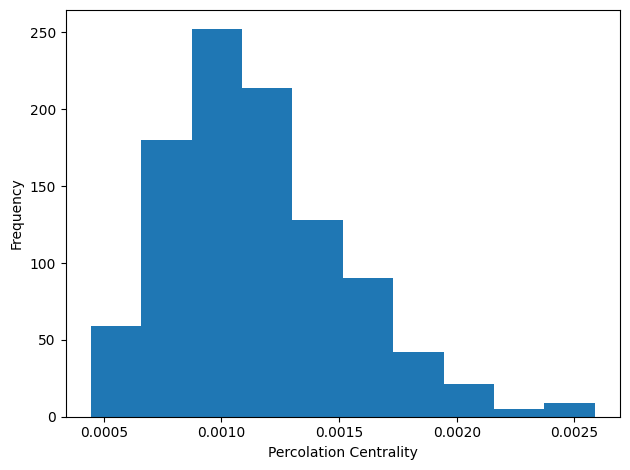

Η μέση κεντρικότητα της διήθησης είναι 0.0011525232647477135 και η διασπορά της είναι 1.4179543060300366e-07
Χρόνος εκτέλεσης:  10.225297212600708
 
Η διασπορά της μετρικής Percolation Centrality είναι:  1.9497216545327673e-06 και ο συντελεστής διασποράς εἰναι:  0.7578005190814229
Ο συνολικός χρόνος υπολογισμού της μετρικής Percolation Centrality είναι:  186.56063413619995 δευτερόλεπτα


In [33]:
pc_variance = []
pc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_percolation(RG_ER)
pc_variance.append(a)
pc_time = pc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_percolation(RG_G)
pc_variance.append(a)
pc_time = pc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_percolation(RGG)
pc_variance.append(a)
pc_time = pc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_percolation(SW)
pc_variance.append(a)
pc_time = pc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_percolation(SF)
pc_variance.append(a)
pc_time = pc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_percolation(WA)
pc_variance.append(a)
pc_time = pc_time + b
print(" ")

print("Η διασπορά της μετρικής Percolation Centrality είναι: ", np.var(pc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(pc_variance))/np.mean(pc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Percolation Centrality είναι: ", pc_time, "δευτερόλεπτα")

## **Load Centrality**

In [34]:
def find_load(G):
  start = time.time()
  lolist = []
  lo_centr = load_centrality(G)
  print("Η κατανομή της κεντρικότητας του φορτίου των κόμβων είναι η εξής:")
  fig = plt.hist(lo_centr.values(), bins=10)
  plt.xlabel('Load Centrality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in lo_centr.values():
    lolist.append(value)
  degaverage = np.average(lolist)
  degvariance = np.var(lolist)
  print("Η μέση κεντρικότητα του φορτίου είναι", degaverage, "και η διασπορά της είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας του φορτίου των κόμβων είναι η εξής:


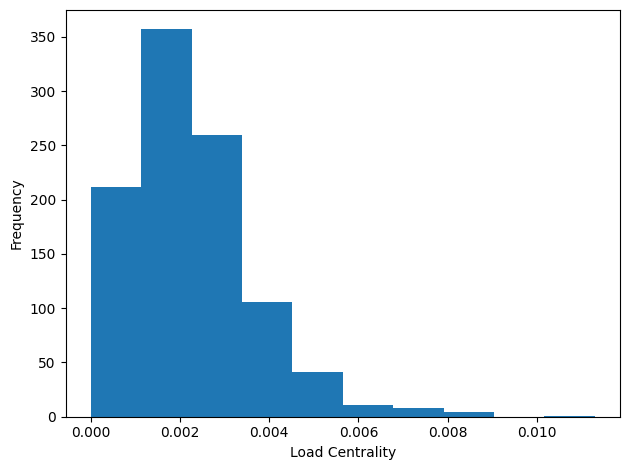

Η μέση κεντρικότητα του φορτίου είναι 0.0022621419014204583 και η διασπορά της είναι 1.9015807504753754e-06
Χρόνος εκτέλεσης:  4.794162750244141
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας του φορτίου των κόμβων είναι η εξής:


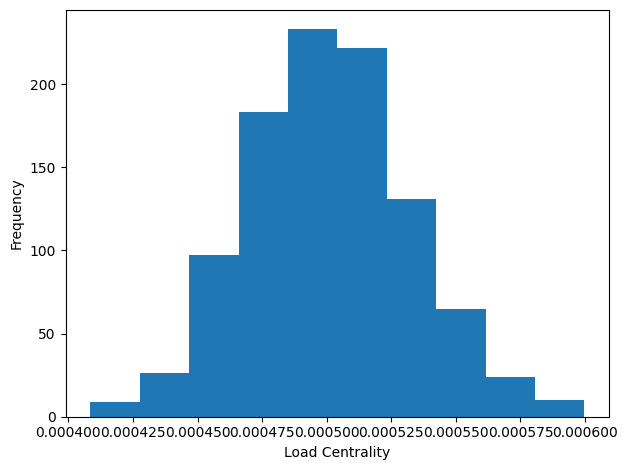

Η μέση κεντρικότητα του φορτίου είναι 0.0005010320942184672 και η διασπορά της είναι 1.007793007657932e-09
Χρόνος εκτέλεσης:  72.19556522369385
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας του φορτίου των κόμβων είναι η εξής:


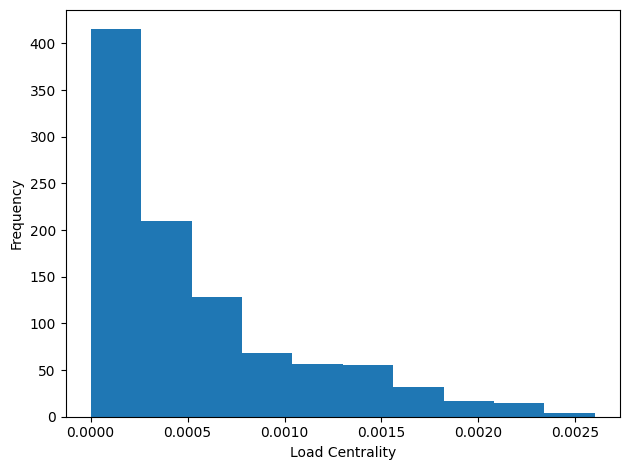

Η μέση κεντρικότητα του φορτίου είναι 0.0005496538622791127 και η διασπορά της είναι 2.938099564925995e-07
Χρόνος εκτέλεσης:  60.40786838531494
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας του φορτίου των κόμβων είναι η εξής:


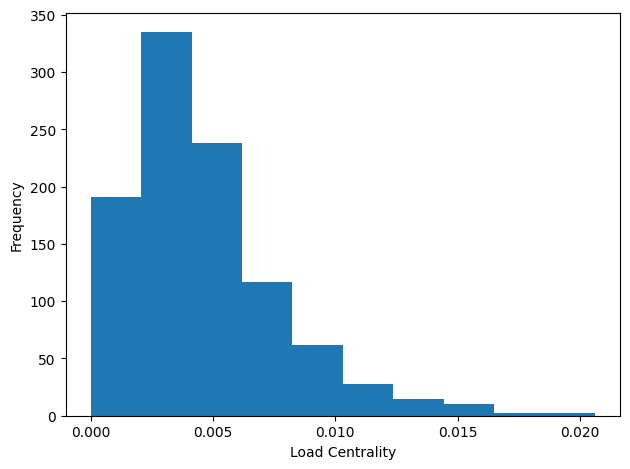

Η μέση κεντρικότητα του φορτίου είναι 0.0045902957065281705 και η διασπορά της είναι 9.801073392855686e-06
Χρόνος εκτέλεσης:  2.729602575302124
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας του φορτίου των κόμβων είναι η εξής:


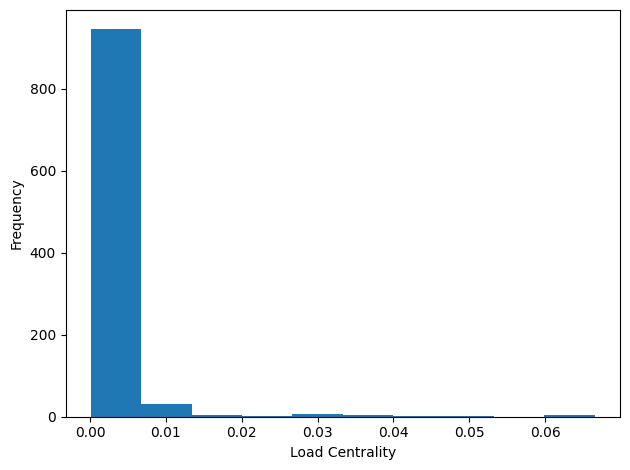

Η μέση κεντρικότητα του φορτίου είναι 0.0019999618857334286 και η διασπορά της είναι 3.2229321002362284e-05
Χρόνος εκτέλεσης:  4.386879920959473
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή της κεντρικότητας του φορτίου των κόμβων είναι η εξής:


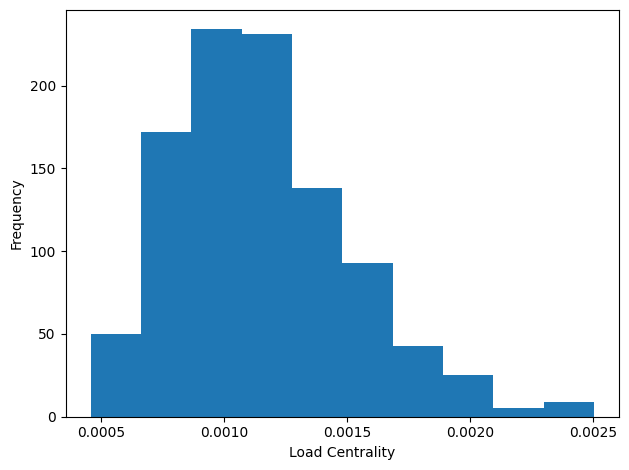

Η μέση κεντρικότητα του φορτίου είναι 0.0011525232647477135 και η διασπορά της είναι 1.2905757524787716e-07
Χρόνος εκτέλεσης:  7.972449541091919
 
Η διασπορά της μετρικής Load Centrality είναι:  1.94972165453277e-06 και ο συντελεστής διασποράς εἰναι:  0.757800519081423
Ο συνολικός χρόνος υπολογισμού της μετρικής Load Centrality είναι:  152.48652839660645 δευτερόλεπτα


In [35]:
lc_variance = []
lc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = find_load(RG_ER)
lc_variance.append(a)
lc_time = lc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = find_load(RG_G)
lc_variance.append(a)
lc_time = lc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = find_load(RGG)
lc_variance.append(a)
lc_time = lc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = find_load(SW)
lc_variance.append(a)
lc_time = lc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = find_load(SF)
lc_variance.append(a)
lc_time = lc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = find_load(WA)
lc_variance.append(a)
lc_time = lc_time + b
print(" ")

print("Η διασπορά της μετρικής Load Centrality είναι: ", np.var(lc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(lc_variance))/np.mean(lc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Load Centrality είναι: ", lc_time, "δευτερόλεπτα")

## **Rich Club Coefficient**

In [36]:
def rich_club(G):
  start = time.time()
  rclist = []
  rich_club = percolation_centrality(G)
  print("Η κατανομή του συντελεστή πλουσίου συλλόγου των κόμβων είναι η εξής:")
  fig = plt.hist(rich_club.values(), bins=10)
  plt.xlabel('Rich Club Coefficient')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in rich_club.values():
    rclist.append(value)
  degaverage = np.average(rclist)
  degvariance = np.var(rclist)
  print("Ο μέσος συντελεστής πλουσίου συλλόγου είναι", degaverage, "και η διασπορά του είναι", degvariance)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return degaverage, end - start

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή πλουσίου συλλόγου των κόμβων είναι η εξής:


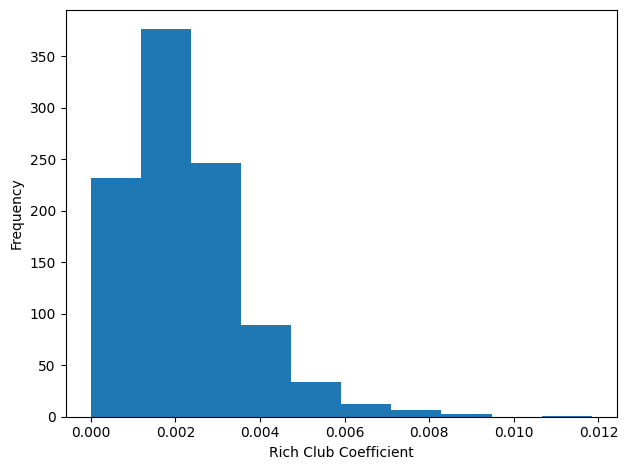

Ο μέσος συντελεστής πλουσίου συλλόγου είναι 0.0022621419014204574 και η διασπορά του είναι 2.0092979974593767e-06
Χρόνος εκτέλεσης:  5.409737586975098
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή πλουσίου συλλόγου των κόμβων είναι η εξής:


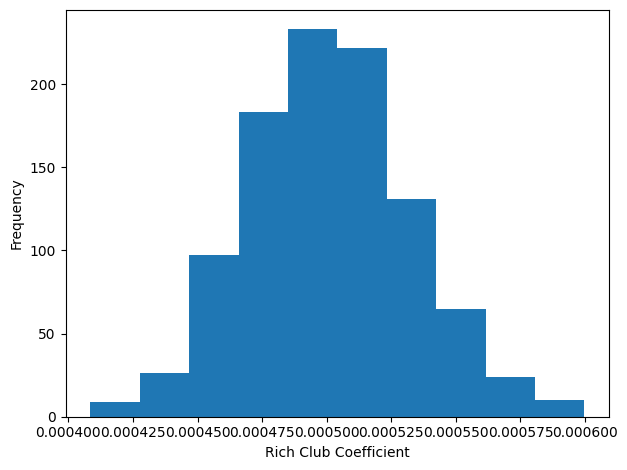

Ο μέσος συντελεστής πλουσίου συλλόγου είναι 0.0005010320942184664 και η διασπορά του είναι 1.0077930076579294e-09
Χρόνος εκτέλεσης:  92.63889813423157
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή πλουσίου συλλόγου των κόμβων είναι η εξής:


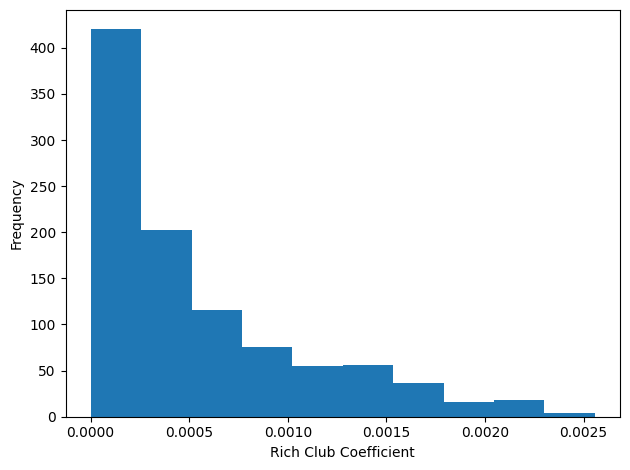

Ο μέσος συντελεστής πλουσίου συλλόγου είναι 0.0005496538622791127 και η διασπορά του είναι 3.013795693628346e-07
Χρόνος εκτέλεσης:  69.78813600540161
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή πλουσίου συλλόγου των κόμβων είναι η εξής:


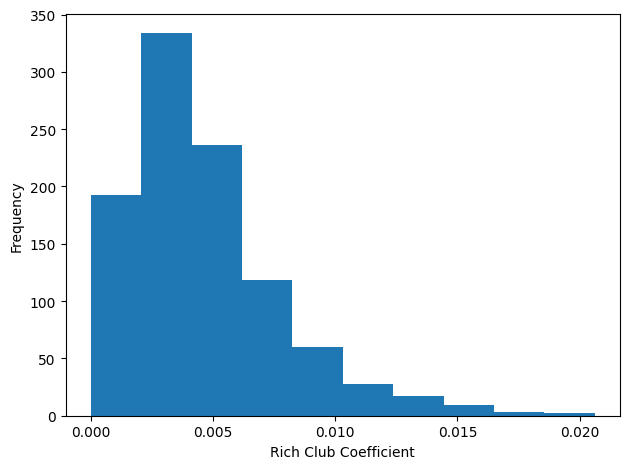

Ο μέσος συντελεστής πλουσίου συλλόγου είναι 0.004590295706528168 και η διασπορά του είναι 9.929874318235833e-06
Χρόνος εκτέλεσης:  4.801183462142944
 
Για τον γράφο SF έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή πλουσίου συλλόγου των κόμβων είναι η εξής:


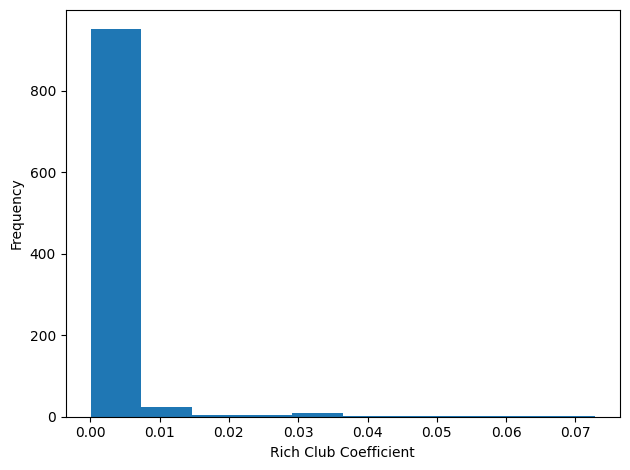

Ο μέσος συντελεστής πλουσίου συλλόγου είναι 0.0019999618857334278 και η διασπορά του είναι 3.610975209860545e-05
Χρόνος εκτέλεσης:  4.201977729797363
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η κατανομή του συντελεστή πλουσίου συλλόγου των κόμβων είναι η εξής:


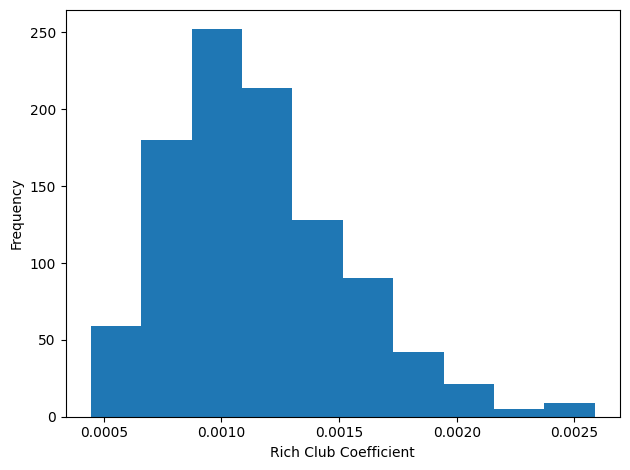

Ο μέσος συντελεστής πλουσίου συλλόγου είναι 0.0011525232647477135 και η διασπορά του είναι 1.4179543060300366e-07
Χρόνος εκτέλεσης:  9.67788314819336
 
Η διασπορά της μετρικής Rich Club Coefficient είναι:  1.9497216545327673e-06 και ο συντελεστής διασποράς εἰναι:  0.7578005190814229
Ο συνολικός χρόνος υπολογισμού της μετρικής Rich Club Coefficient είναι:  186.51781606674194 δευτερόλεπτα


In [37]:
rcc_variance = []
rcc_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = rich_club(RG_ER)
rcc_variance.append(a)
rcc_time = rcc_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = rich_club(RG_G)
rcc_variance.append(a)
rcc_time = rcc_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = rich_club(RGG)
rcc_variance.append(a)
rcc_time = rcc_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = rich_club(SW)
rcc_variance.append(a)
rcc_time = rcc_time + b
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
a, b = rich_club(SF)
rcc_variance.append(a)
rcc_time = rcc_time + b
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = rich_club(WA)
rcc_variance.append(a)
rcc_time = rcc_time + b
print(" ")

print("Η διασπορά της μετρικής Rich Club Coefficient είναι: ", np.var(rcc_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(rcc_variance))/np.mean(rcc_variance))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Rich Club Coefficient είναι: ", rcc_time, "δευτερόλεπτα")

## **Closeness Vitality**

In [38]:
def closeness_vitality(G):
  start = time.time()
  cvlist = []
  close_vit = closeness_vitality(G)
  print("Η κατανομή της ζωτικότητας της εγγύτητας των κόμβων είναι η εξής:")
  fig = plt.hist(close_vit.values(), bins=10)
  plt.xlabel('Closeness Vitality')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()
  for value in close_vit.values():
    cvlist.append(value)
  degaverage = np.average(cvlist)
  degvariance = np.var(cvlist)
  print("Η μέση ζωτικότητα της εγγύτητας είναι", degaverage, "και η διασπορά της είναι", degvariance)



```
#Παίρνει υπερβολικό χρόνο και δημιούργησε crash

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
closeness_vitality(RG_ER)
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
closeness_vitality(RG_G)
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
closeness_vitality(RGG)
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
closeness_vitality(SW)
print(" ")
print("Για τον γράφο SF έχουμε τα εξής αποτελέσματα: ")
closeness_vitality(SF)
print(" ")
print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
closeness_vitality(WA)
print(" ")
```



## **Assortativity**

In [39]:
def assortativity(G):
  start = time.time()
  assort = nx.degree_pearson_correlation_coefficient(G) # Assortativity with efficient Pearson algorithm
  print("Η συνάφεια του γράφου είναι ", assort)
  end = time.time()
  print("Χρόνος εκτέλεσης: ", end - start)
  return assort, end - start

In [40]:
a_variance = []
a_time = 0

print("Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: ")
a, b = assortativity(RG_ER)
a_variance.append(a)
a_time = a_time + b
print(" ")
print("Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: ")
a, b = assortativity(RG_G)
a_variance.append(a)
a_time = a_time + b
print(" ")
print("Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: ")
a, b = assortativity(RGG)
a_variance.append(a)
a_time = a_time + b
print(" ")
print("Για τον γράφο SW έχουμε τα εξής αποτελέσματα: ")
a, b = assortativity(SW)
a_variance.append(a)
a_time = a_time + b
print(" ")
print("Για τον γράφο SF(BA) έχουμε τα εξής αποτελέσματα: ")
a, b = assortativity(SF)
a_variance.append(a)
a_time = a_time + b
print(" ")

print("Για τον γράφο WA έχουμε τα εξής αποτελέσματα: ")
a, b = assortativity(WA)
a_variance.append(a)
a_time = a_time + b
print(" ")

print("Η διασπορά της μετρικής Assortativity είναι: ", np.var(a_variance), "και ο συντελεστής διασποράς εἰναι: ", np.sqrt(np.var(a_variance))/abs(np.mean(a_variance)))
print("Ο συνολικός χρόνος υπολογισμού της μετρικής Assortativity είναι: ", a_time, "δευτερόλεπτα")

Για τον γράφο RG(ER) έχουμε τα εξής αποτελέσματα: 
Η συνάφεια του γράφου είναι  0.011471619604866227
Χρόνος εκτέλεσης:  0.5311744213104248
 
Για τον γράφο RG(G) έχουμε τα εξής αποτελέσματα: 
Η συνάφεια του γράφου είναι  -0.0016655517843509819
Χρόνος εκτέλεσης:  1.5040690898895264
 
Για τον γράφο RGG έχουμε τα εξής αποτελέσματα: 
Η συνάφεια του γράφου είναι  0.10944641177815242
Χρόνος εκτέλεσης:  1.5607824325561523
 
Για τον γράφο SW έχουμε τα εξής αποτελέσματα: 
Η συνάφεια του γράφου είναι  -0.09056124100044258
Χρόνος εκτέλεσης:  0.01853036880493164
 
Για τον γράφο SF(BA) έχουμε τα εξής αποτελέσματα: 
Η συνάφεια του γράφου είναι  -0.04955005120669064
Χρόνος εκτέλεσης:  0.030738353729248047
 
Για τον γράφο WA έχουμε τα εξής αποτελέσματα: 
Η συνάφεια του γράφου είναι  0.014121565469864053
Χρόνος εκτέλεσης:  0.08124637603759766
 
Η διασπορά της μετρικής Assortativity είναι:  0.0038268814407493006 και ο συντελεστής διασποράς εἰναι:  55.09234717555147
Ο συνολικός χρόνος υπολογισμού της μετρ

# **Αποτελέσματα**

**Μετρικές:**


* Degree distribution: ✅ (Δεν το τέσταρα αλλά προφανώς θα μπει)
* Average Path Length: ✅ (Διαφορές υπάρχουν αλλά είναι αξιόπιστο; Ας το βάλω γιατί θεωρείται κριτήριο για κάποιους γράφους)
* Clustering Coeffcient: ✅ (Μεγάλες διαφορές)
* Betweenness Centrality: ✅ Μεγάλες διαφορές στις τιμές και τις κατανομές, κάποιοι κακοί χρόνοι εκτέλεσης
* Closeness Centrality: ❌ Παρόμοιες οι κατανομές, διαφορά στις τιμές, πολύ καλοί χρόνοι
* Information Centrality: ✅ (Σχετικά διαφορετικές κατανομές, διαφορετικές τιμές, μικρός χρόνος εκτέλεσης)
* Routing Centrality: ❌ (Κάποιες κατανομές είναι παρόμοιες, μεγάλοι χρόνοι εκτέλεσης για κάποιους γράφους)
* Bridging Centrality: ✅ Αρκετά διαφορετικές τιμές και κατανομές, κάποιοι κακοί χρόνοι
* Spectral Centrality: ❌ (Αδύνατη η υλοποίηση)
* Eignevectror Centrality: ✅ Αρκετές διαφορές σε τιμές και κατανομές, καλοί χρόνοι
* Katz Centrality: ❌ (Σχεδόν ολόιδια με την eigenvector)
* Laplacian Centrality: ❌ (Πολύ αργό)
* Harmonic Centrality: ✅ Σχετικά διαφορετικές κατανομές, διαφορετικές τιμές, καλοί χρόνοι
* Percolation Centrality: ❌ (Αρκετά διαφορετικές κατανομές, μερικοί κακοί χρόνοι)
* Load Centrality: ❌ Σχεδόν ολόιδιο με το percolation, λίγο γρηγορότερο
* Rich Club Coefficient: ✅ (Αρκετά διαφορετικές κατανομές και τιμές, καλοί χρόνοι)
* Closeness Vitality: ❌ (Πάρα πολύ αργό)
* Assortativity: ✅ Σχετικά διαφορετικές τιμές, καλοί χρόνοι



In [41]:
#Να υπολογίσω διασπορά για την κάθε μετρική (μετρό διαφοράς ανά είδος γράφου). Να φτιάξω διαγράμματα: διασπορά ανά μετρική, συνολικός χρόνος ανά μετρική.
#Ίσως ένας πίνακας με τον συνολικό χρόνο και διασπορά για κάθε μετρική; (και ο παρακάτω λόγος 3η στύλη)
#Γραφική παράσταση του λόγου variance/time για όλες τις μετρικές πάνω από τον πίνακα;

#Να βρω διασπορές *μεταξύ* μετρικών, πχ μεταξύ των διανυσμάτων [1, 2, ...] και [5, 6, ...] ώστε να αποκλείσω επίσημα αυτές που είναι υπερβολικά όμοιες μεταξύ τους


#Πρόσεξε και τις αλλαγές που έγιναν στο επόμενο notebook!!

# **Πίνακας και Γραφική Παράσταση**

/tmp/ipython-input-51-456819232.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(df))


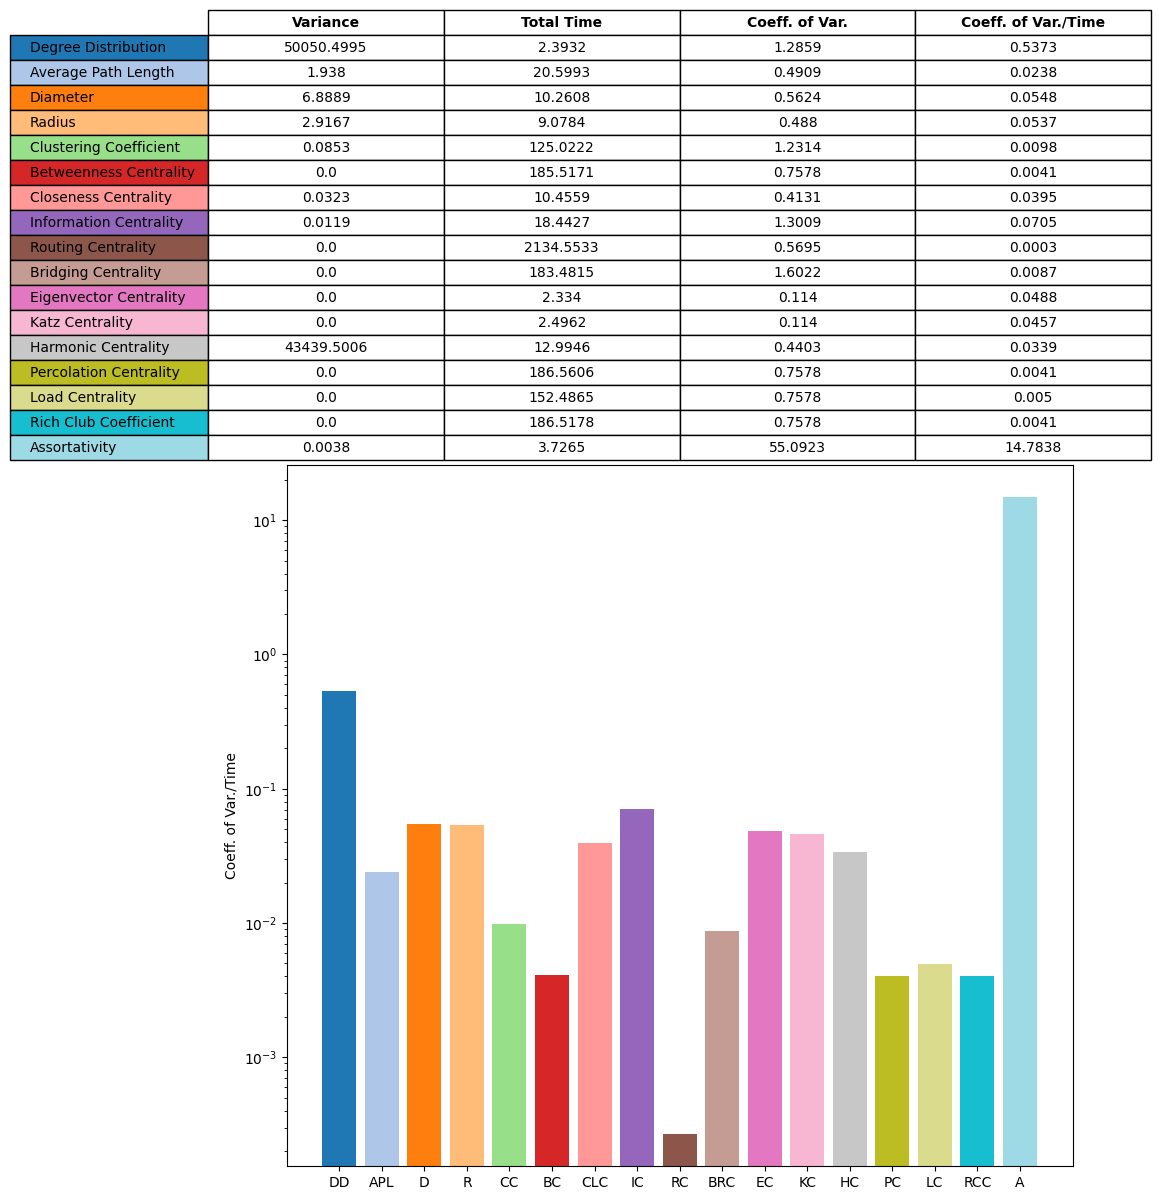

In [51]:
import pandas as pd
import matplotlib.cm as cm

def coef_of_var(variance):
  return np.sqrt(np.var(variance))/abs(np.mean(variance))

data = [[np.var(dd_variance), dd_time, coef_of_var(dd_variance), coef_of_var(dd_variance)/dd_time],
        [np.var(pl_variance), pl_time, coef_of_var(pl_variance), coef_of_var(pl_variance)/pl_time],
        [np.var(d_variance), d_time, coef_of_var(d_variance), coef_of_var(d_variance)/d_time],
        [np.var(r_variance), r_time, coef_of_var(r_variance), coef_of_var(r_variance)/r_time],
        [np.var(cc_variance), cc_time, coef_of_var(cc_variance), coef_of_var(cc_variance)/cc_time],
        [np.var(bc_variance), bc_time, coef_of_var(bc_variance), coef_of_var(bc_variance)/bc_time],
        [np.var(ccen_variance), ccen_time, coef_of_var(ccen_variance), coef_of_var(ccen_variance)/ccen_time],
        [np.var(ic_variance), ic_time, coef_of_var(ic_variance), coef_of_var(ic_variance)/ic_time],
        [np.var(rc_variance), rc_time, coef_of_var(rc_variance), coef_of_var(rc_variance)/rc_time],
        [np.var(brc_variance), brc_time, coef_of_var(brc_variance), coef_of_var(brc_variance)/brc_time],
        [np.var(ec_variance), ec_time, coef_of_var(ec_variance), coef_of_var(ec_variance)/ec_time],
        [np.var(kc_variance), kc_time, coef_of_var(kc_variance), coef_of_var(kc_variance)/kc_time],
        [np.var(hc_variance), hc_time, coef_of_var(hc_variance), coef_of_var(hc_variance)/hc_time],
        [np.var(pc_variance), pc_time, coef_of_var(pc_variance), coef_of_var(pc_variance)/pc_time],
        [np.var(lc_variance), lc_time, coef_of_var(lc_variance), coef_of_var(lc_variance)/lc_time],
        [np.var(rcc_variance), rcc_time, coef_of_var(rcc_variance), coef_of_var(rcc_variance)/rcc_time],
        [np.var(a_variance), a_time, coef_of_var(a_variance), coef_of_var(a_variance)/a_time]]

columns = ('Variance', 'Total Time', 'Coeff. of Var.',
           'Coeff. of Var./Time')

rows = ['Degree Distribution', 'Average Path Length', 'Diameter', 'Radius', 'Clustering Coefficient', 'Betweenness Centrality', 'Closeness Centrality', 'Information Centrality', 'Routing Centrality',
'Bridging Centrality', 'Eigenvector Centrality', 'Katz Centrality', 'Harmonic Centrality', 'Percolation Centrality', 'Load Centrality',
'Rich Club Coefficient', 'Assortativity']

short_labels = ['DD', 'APL', 'D', 'R', 'CC', 'BC', 'CLC', 'IC', 'RC', 'BRC', 'EC', 'KC', 'HC', 'PC', 'LC', 'RCC', 'A']

df = pd.DataFrame(data, columns=columns, index=rows)

# Colormap and row colors
cmap = cm.get_cmap('tab20', len(df))
row_colors = [cmap(i) for i in range(len(df))]

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [1, 2]})

# Table
ax1.axis('off')
table = ax1.table(cellText=np.round(df.values, 4),
                  rowLabels=rows,
                  colLabels=columns,
                  cellLoc='center',
                  rowColours=row_colors,
                  loc='center')

for (row, col), cell in table.get_celld().items():
 if row == 0:  # Header row
  cell.set_text_props(weight='bold')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Bar plot
ax2.bar(short_labels, df['Coeff. of Var./Time'], color=row_colors)
ax2.set_yscale('log')
ax2.set_ylabel('Coeff. of Var./Time')

plt.tight_layout()
plt.show()